In [1]:
import torch
from tqdm import tqdm

In [2]:
import os
import sys

sys.path.append(os.path.pardir)

In [3]:
from cpm_torch.CPM_Image import *
from cpm_torch.CPM import *

error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPUを利用します: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CPUを利用します")

config = CPM_config(
    l_A=1.0,  # 面積エネルギー項の係数λ_A
    l_L=1.0,  # 周囲長エネルギー項の係数λ_L
    A_0=15.0,  # 目標細胞面積 A_0
    L_0=15.0,  # 目標細胞周囲長 L_0
    T=1.0,  # 温度パラメータ T
    size =(16, 16)
)
print(config.__dict__)

GPUを利用します: NVIDIA H100 PCIe
{'size': (16, 16), 'dim': 2, 'height': 16, 'width': 16, 'depth': 1, 'l_A': 1.0, 'l_L': 1.0, 'A_0': 15.0, 'L_0': 15.0, 'T': 1.0, 'diffusion_channels': [2], 'other_channels': 1, 'diffusion_D': [0.1], 'diffusion_percent': [1.0]}


### 初期条件

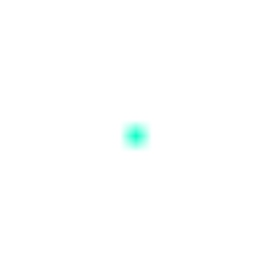

In [5]:
cpm = CPM(config, device)  # CPMのインスタンスを作成
tensor = torch.zeros((1, config.size[0], config.size[1], 3), device=device)  # 初期状態のテンソルを作成
tensor[0, 8, 8, 0] = 1.0  # 初期状態に細胞を配置
cell_count = 1  # 細胞の数を1に設定
imshow_map(tensor[0])  # 初期状態を表示

### シュミレーション

ステップ:   0%|          | 0/500 [00:00<?, ?it/s]

area: tensor([255.,   1.,   0.], device='cuda:0')
perimeter: tensor([4., 4., 0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


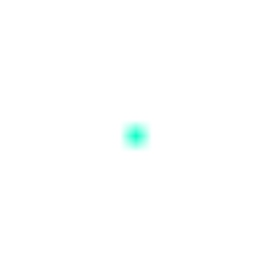

ステップ:   0%|          | 1/500 [00:00<01:14,  6.68it/s]

area: tensor([255.,   1.,   0.], device='cuda:0')
perimeter: tensor([4., 4., 0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -27.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


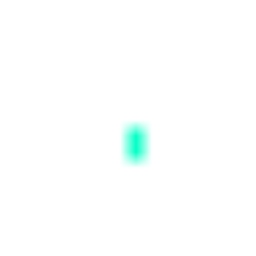

area: tensor([254.,   2.,   0.], device='cuda:0')
perimeter: tensor([6., 6., 0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


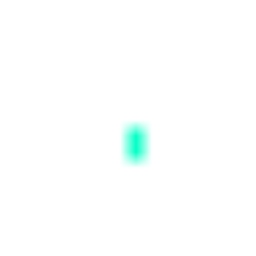

area: tensor([254.,   2.,   0.], device='cuda:0')
perimeter: tensor([6., 6., 0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


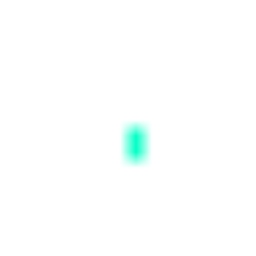

area: tensor([254.,   2.,   0.], device='cuda:0')
perimeter: tensor([6., 6., 0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -25.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


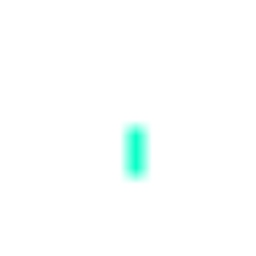

area: tensor([253.,   3.,   0.], device='cuda:0')
perimeter: tensor([8., 8., 0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,
          0.,   0.,   0., -23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


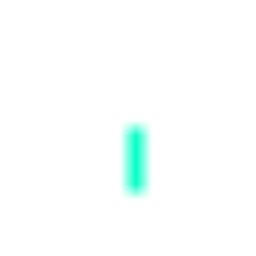

area: tensor([252.,   4.,   0.], device='cuda:0')
perimeter: tensor([10., 10.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., -21.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


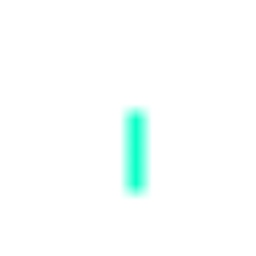

area: tensor([251.,   5.,   0.], device='cuda:0')
perimeter: tensor([12., 12.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


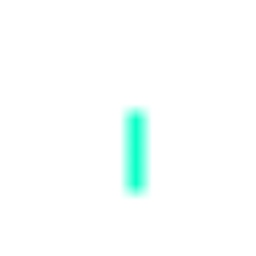

area: tensor([251.,   5.,   0.], device='cuda:0')
perimeter: tensor([12., 12.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


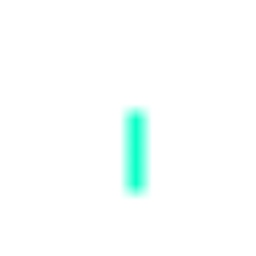

area: tensor([251.,   5.,   0.], device='cuda:0')
perimeter: tensor([12., 12.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


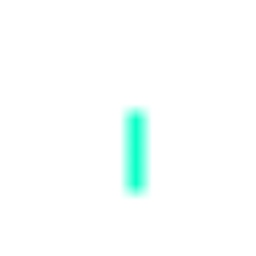

area: tensor([251.,   5.,   0.], device='cuda:0')
perimeter: tensor([12., 12.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., -19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


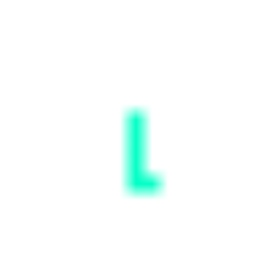

area: tensor([250.,   6.,   0.], device='cuda:0')
perimeter: tensor([14., 14.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 19.,  0.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


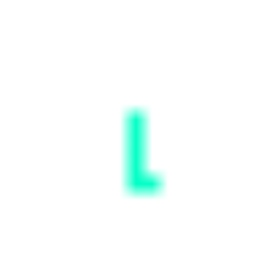

area: tensor([250.,   6.,   0.], device='cuda:0')
perimeter: tensor([14., 14.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


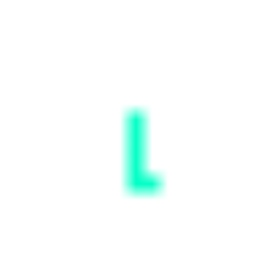

area: tensor([250.,   6.,   0.], device='cuda:0')
perimeter: tensor([14., 14.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0., 19.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


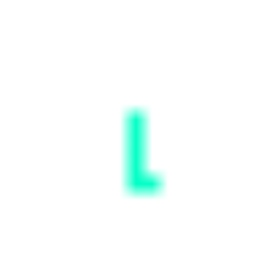

area: tensor([250.,   6.,   0.], device='cuda:0')
perimeter: tensor([14., 14.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


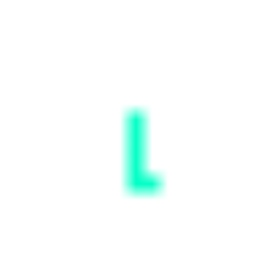

area: tensor([250.,   6.,   0.], device='cuda:0')
perimeter: tensor([14., 14.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -17.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


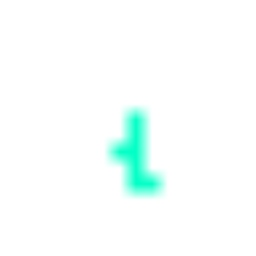

area: tensor([249.,   7.,   0.], device='cuda:0')
perimeter: tensor([16., 16.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


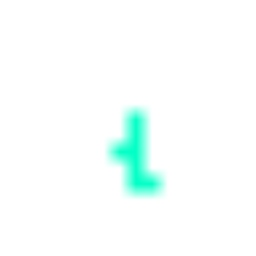

area: tensor([249.,   7.,   0.], device='cuda:0')
perimeter: tensor([16., 16.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


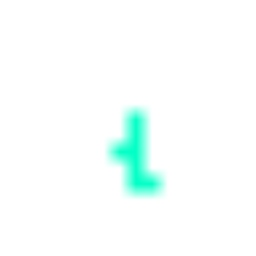

area: tensor([249.,   7.,   0.], device='cuda:0')
perimeter: tensor([16., 16.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -15.,   0.,   0.,   0.,
          0.,   0., -15., -15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


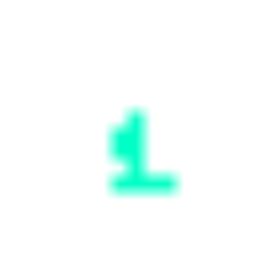

area: tensor([246.,  10.,   0.], device='cuda:0')
perimeter: tensor([20., 20.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


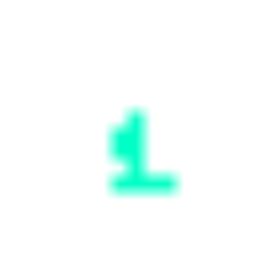

area: tensor([246.,  10.,   0.], device='cuda:0')
perimeter: tensor([20., 20.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0., -9.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


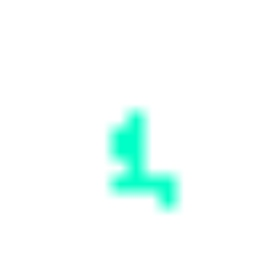

ステップ:   4%|▍         | 21/500 [00:00<00:04, 99.06it/s]

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 9., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


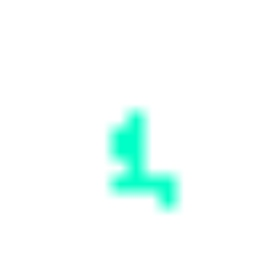

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 9., 0., 0., 0., 0., 0., 9., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


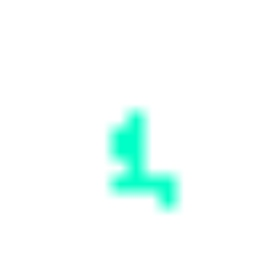

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 0., 0., 0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


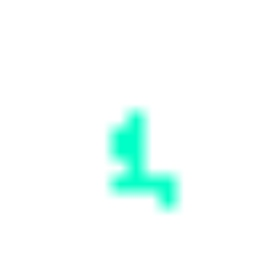

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


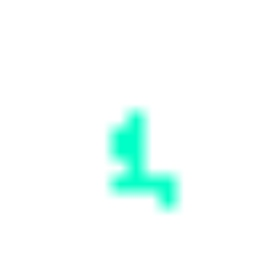

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 0., 0.,
        0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


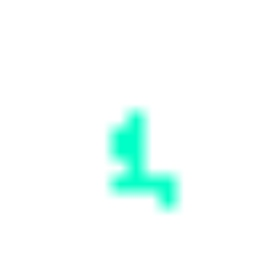

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


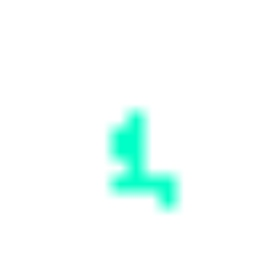

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


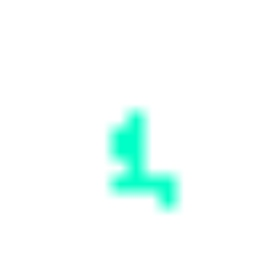

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


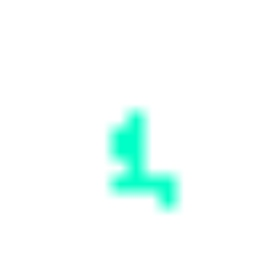

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


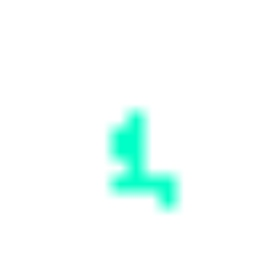

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


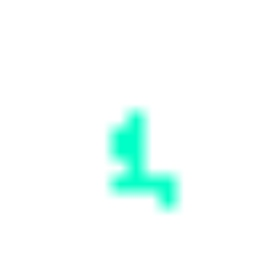

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


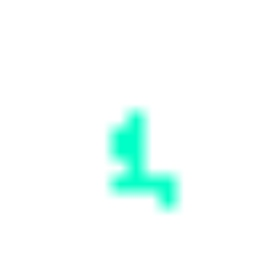

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 9., 0., 0., 0., 0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


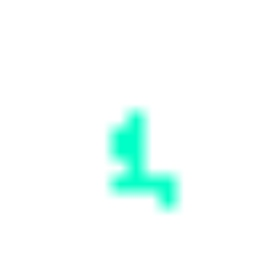

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


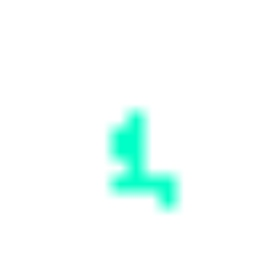

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


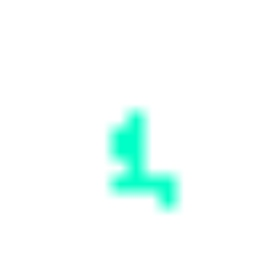

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 9., 0., 0., 0., 0., 0., 9., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


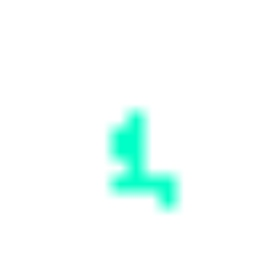

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


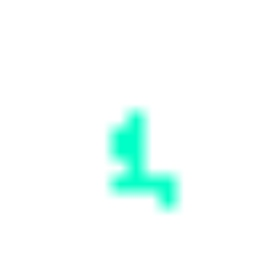

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


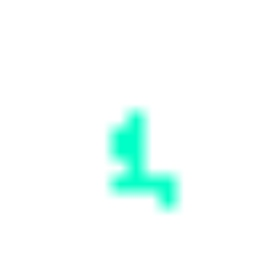

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 9., 0., 0., 0., 0., 0., 9., 9., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


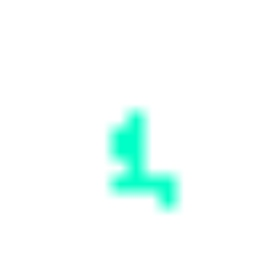

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


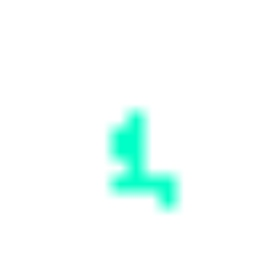

ステップ:   8%|▊         | 40/500 [00:00<00:03, 135.86it/s]

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -7.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


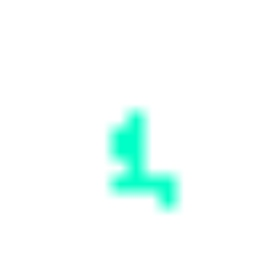

area: tensor([245.,  11.,   0.], device='cuda:0')
perimeter: tensor([22., 22.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -7.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


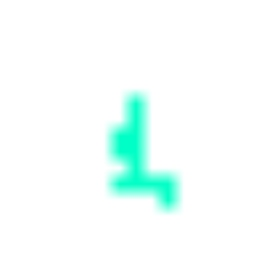

area: tensor([244.,  12.,   0.], device='cuda:0')
perimeter: tensor([24., 24.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')


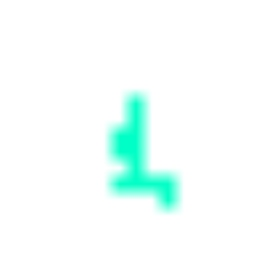

area: tensor([244.,  12.,   0.], device='cuda:0')
perimeter: tensor([24., 24.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0., -5.,  7.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


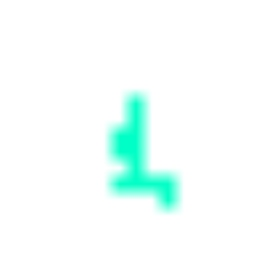

area: tensor([244.,  12.,   0.], device='cuda:0')
perimeter: tensor([24., 24.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -5.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


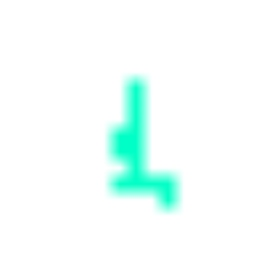

area: tensor([243.,  13.,   0.], device='cuda:0')
perimeter: tensor([26., 26.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -3.,  0.,  0.,  0.,  0.,  0., -3.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


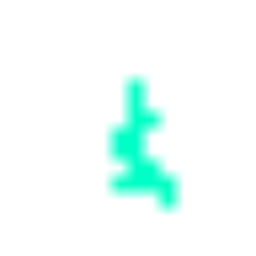

area: tensor([241.,  15.,   0.], device='cuda:0')
perimeter: tensor([28., 28.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


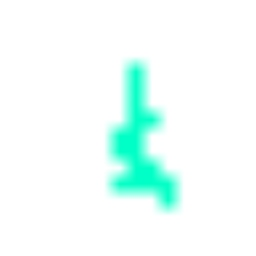

area: tensor([240.,  16.,   0.], device='cuda:0')
perimeter: tensor([30., 30.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


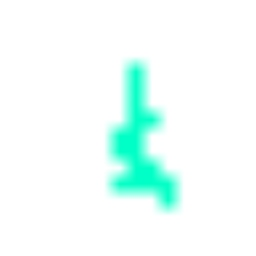

area: tensor([240.,  16.,   0.], device='cuda:0')
perimeter: tensor([30., 30.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 3., 0., 0., 0., 0., 3., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


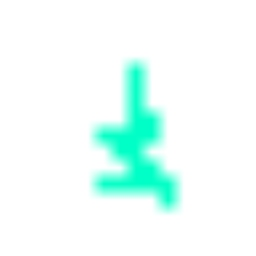

area: tensor([237.,  19.,   0.], device='cuda:0')
perimeter: tensor([34., 34.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9., 9., 0., 0.,
        0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


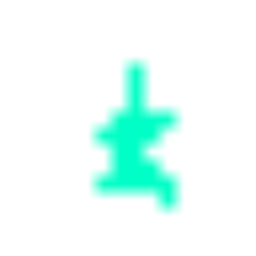

area: tensor([234.,  22.,   0.], device='cuda:0')
perimeter: tensor([34., 34.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., -13.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


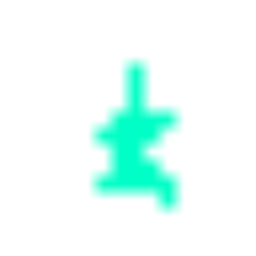

area: tensor([234.,  22.,   0.], device='cuda:0')
perimeter: tensor([34., 34.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0., -13.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


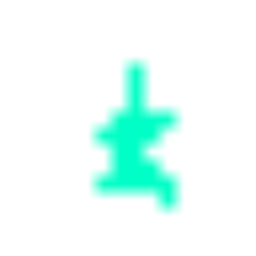

area: tensor([234.,  22.,   0.], device='cuda:0')
perimeter: tensor([34., 34.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -13.,   0.,   0.,
          0.,   0.,   0.,   2.,  15.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


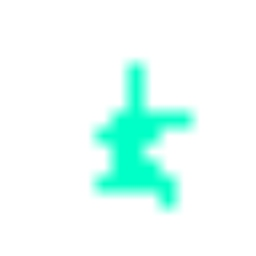

area: tensor([233.,  23.,   0.], device='cuda:0')
perimeter: tensor([36., 36.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., -15., -15.,   0.,   0.,   0.,   0.,   2.,  17.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


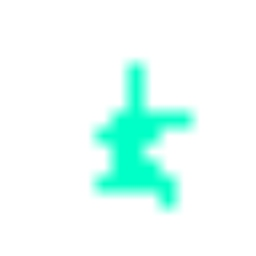

area: tensor([233.,  23.,   0.], device='cuda:0')
perimeter: tensor([36., 36.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        17.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


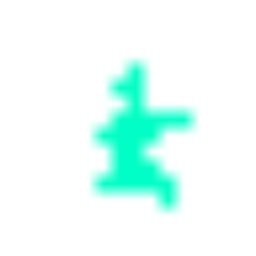

area: tensor([232.,  24.,   0.], device='cuda:0')
perimeter: tensor([38., 38.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -17.,   0.,   0.,   0.,
          0.,   0.,  19., -17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


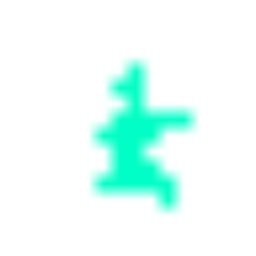

ステップ:  11%|█         | 56/500 [00:00<00:03, 143.97it/s]

area: tensor([232.,  24.,   0.], device='cuda:0')
perimeter: tensor([38., 38.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -17.,   0.,   0.,
          0.,   0.,   0.,   2., -17.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


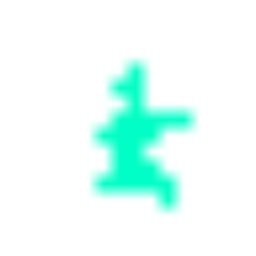

area: tensor([232.,  24.,   0.], device='cuda:0')
perimeter: tensor([38., 38.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., -17.,   0.,   0.,   0.,   0.,  19.,   2.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


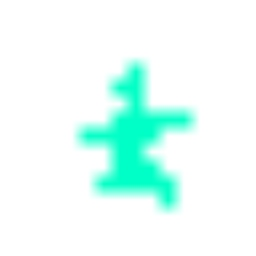

area: tensor([231.,  25.,   0.], device='cuda:0')
perimeter: tensor([40., 40.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., -19.,   0.,   0.,   0.,   0.,   0.,   2.,  21.,   0.,   0.,
          0.,   0.,   2., -19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


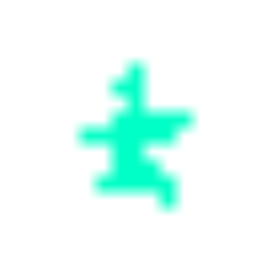

area: tensor([230.,  26.,   0.], device='cuda:0')
perimeter: tensor([40., 40.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
        23.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


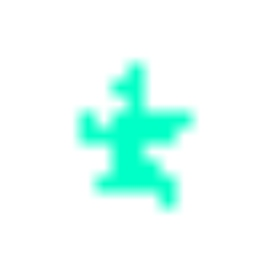

area: tensor([229.,  27.,   0.], device='cuda:0')
perimeter: tensor([42., 42.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  25.,  25.,   0.,   0.,   0.,   0., -23.,   0.,   0.,   0.,
          0.,   0.,  25., -23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


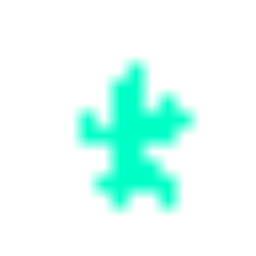

area: tensor([226.,  30.,   0.], device='cuda:0')
perimeter: tensor([44., 44.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  2.,  2., 31.,  0.,  0.,  0., 31.,  2.,
        31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


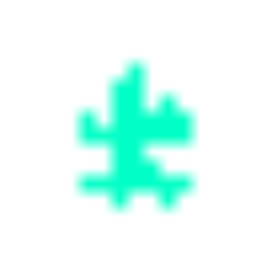

area: tensor([223.,  33.,   0.], device='cuda:0')
perimeter: tensor([48., 48.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -35.,   0.,   0.,
          0.,   0., -35.,   2., -35.,   0.,   0.,   0.,   0.,   2.,  37.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


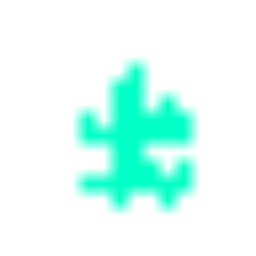

area: tensor([222.,  34.,   0.], device='cuda:0')
perimeter: tensor([50., 50.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., -37., -37.,   0.,   0.,   0.,   0., -37.,  39.,   0.,   0.,
          0.,   0., -37., -37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


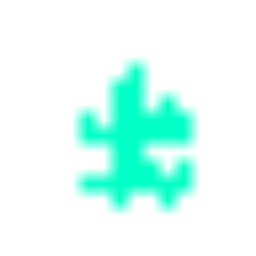

area: tensor([222.,  34.,   0.], device='cuda:0')
perimeter: tensor([50., 50.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., -37.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


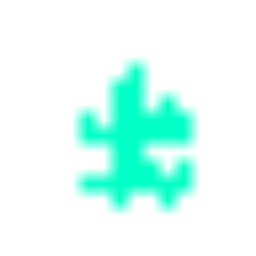

area: tensor([222.,  34.,   0.], device='cuda:0')
perimeter: tensor([50., 50.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        39.,  2.,  0.,  0.,  0.,  0., 39.,  2., 39.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


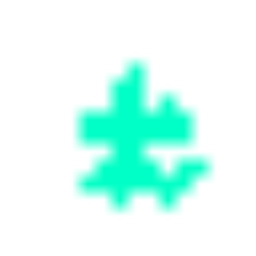

area: tensor([219.,  37.,   0.], device='cuda:0')
perimeter: tensor([50., 50.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0., 45.,
         2.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


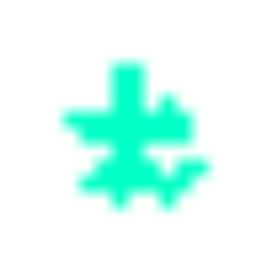

area: tensor([217.,  39.,   0.], device='cuda:0')
perimeter: tensor([52., 52.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
        49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


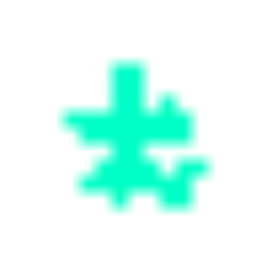

area: tensor([216.,  40.,   0.], device='cuda:0')
perimeter: tensor([52., 52.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0., 51.,  2.,  2.,  0.,  0.,  0., 51.,  2.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


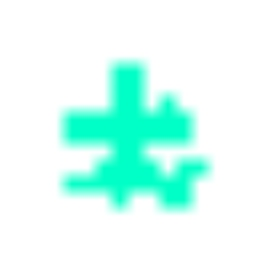

area: tensor([214.,  42.,   0.], device='cuda:0')
perimeter: tensor([54., 54.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,
          0.,   0., -53.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


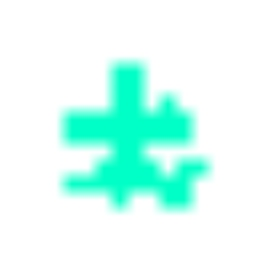

area: tensor([214.,  42.,   0.], device='cuda:0')
perimeter: tensor([54., 54.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0., -53.,   2.,   2.,   0.,
          0.,   0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


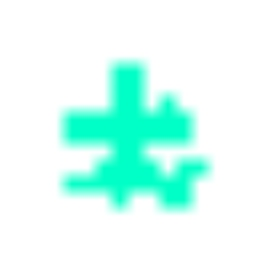

area: tensor([214.,  42.,   0.], device='cuda:0')
perimeter: tensor([54., 54.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., -53.,   0.,   0.,   0.,   0.,   2.,   2., -53.,   0.,
          0.,   0., -53., -53.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


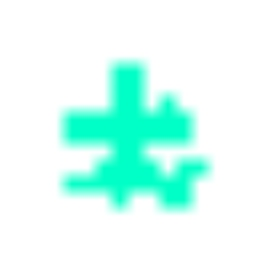

area: tensor([214.,  42.,   0.], device='cuda:0')
perimeter: tensor([54., 54.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55.,   0.,   0.,
          0.,   0.,   2.,   2.,  55.,   0.,   0.,   0., -53., -53., -53.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


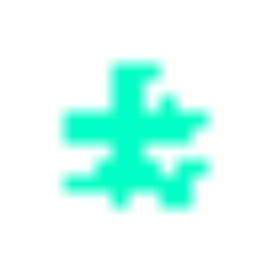

area: tensor([212.,  44.,   0.], device='cuda:0')
perimeter: tensor([58., 58.,  0.], device='cuda:0')
delta_H_area: tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        59., 59., 59.,  0.,  0.,  0., 59., 59.,  0.,  0.,  0.,  0.,  0.,  0.,
        59.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')


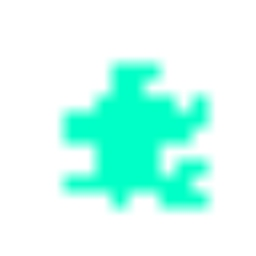

ステップ:  15%|█▍        | 74/500 [00:00<00:02, 155.46it/s]

area: tensor([206.,  50.,   0.], device='cuda:0')
perimeter: tensor([56., 56.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -69.,  71.,   0.,   0.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,  71.,   2.,  71.,   0.,   0.,
          0.,   0.,   0.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


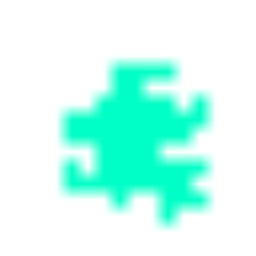

area: tensor([202.,  54.,   0.], device='cuda:0')
perimeter: tensor([60., 60.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -77., -77.,   0.,   0.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,   0.,
          0.,   0.,  79.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


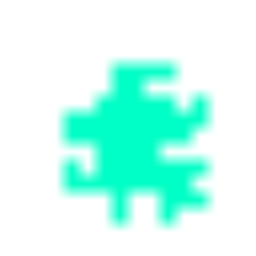

area: tensor([201.,  55.,   0.], device='cuda:0')
perimeter: tensor([62., 62.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -79.,   0.,   0.,
          0.,  81.,   2.,   2., -79.,   0.,   0.,   0.,   2.,   2., -79.,   0.,
          0.,   0.,   0.,   0.,  81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


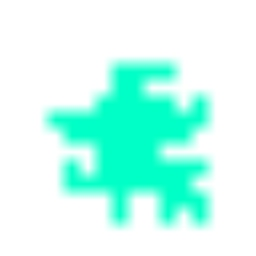

area: tensor([199.,  57.,   0.], device='cuda:0')
perimeter: tensor([66., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -83., -83.,   0.,   0.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,   0.,
          0.,   0., -83., -83.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


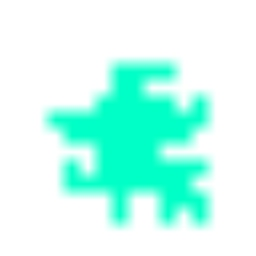

area: tensor([199.,  57.,   0.], device='cuda:0')
perimeter: tensor([66., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  85., -83.,   0.,   0.,
          0., -83.,   2.,   2.,   2.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,
          0.,   0.,  85.,   0., -83.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


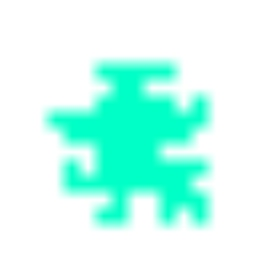

area: tensor([197.,  59.,   0.], device='cuda:0')
perimeter: tensor([70., 70.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  89.,   0.,   0.,   0.,   0.,   2.,   2.,  89.,   0.,
          0.,   0., -87.,   2.,  89.,   0.,   0.,   0.,  89.,   0.,   0.,   0.],
       device='cuda:0')


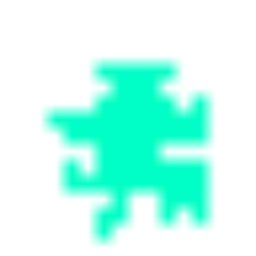

area: tensor([193.,  63.,   0.], device='cuda:0')
perimeter: tensor([68., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0., -95.,   2.,   2.,   0.,   0.,
          0., -95.,   2.,   2.,  97.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


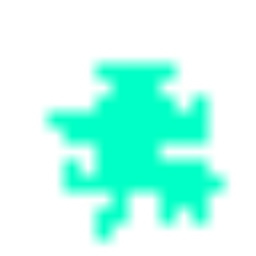

area: tensor([192.,  64.,   0.], device='cuda:0')
perimeter: tensor([70., 70.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0., -97.,   2., -97.,   0.,
          0.,   0., -97.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


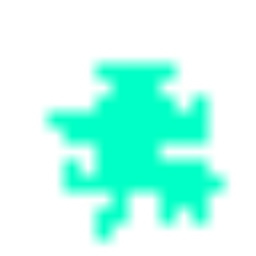

area: tensor([192.,  64.,   0.], device='cuda:0')
perimeter: tensor([70., 70.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0., -97.,   2., -97.,   0.,   0.,   0.,  99.,   2.,   2.,   0.,
          0.,   0.,   0.,   0.,  99.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


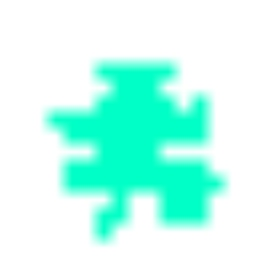

area: tensor([190.,  66.,   0.], device='cuda:0')
perimeter: tensor([66., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2., -101.,
           0.,    0.,    0.,    2.,    2.,    2.,    0.,    0.,    0., -101.,
           2.,    2.,    0.,    0.,    0.,    0., -101.,    2.,  103.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


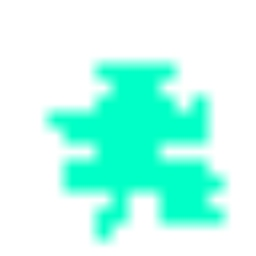

area: tensor([189.,  67.,   0.], device='cuda:0')
perimeter: tensor([68., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           2.,    2., -103.,    0.,    0.,    0.,    2.,    2.,    2.,  105.,
           0.,    0.,    0.,    0.,  105.,    0.], device='cuda:0')


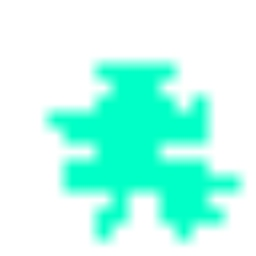

area: tensor([187.,  69.,   0.], device='cuda:0')
perimeter: tensor([72., 72.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  109.,    2.,    0.,    0.,    0.,  109.,
           2.,    2.,    2.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0., -107.,    0.,  109.,    0.], device='cuda:0')


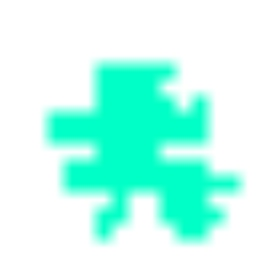

area: tensor([184.,  72.,   0.], device='cuda:0')
perimeter: tensor([70., 70.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -113.,    2.,
           0.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2., -113.,    0.,    0.,    0.,    2.,  115.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


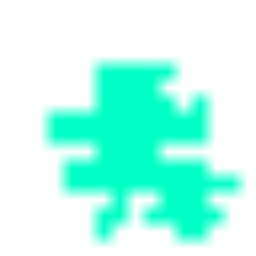

area: tensor([183.,  73.,   0.], device='cuda:0')
perimeter: tensor([72., 72.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2., -115.,
           0.,    0.,    0.,    2.,    2.,    2.,    0.,    0.,    0., -115.,
           2.,    2.,  117.,    0.,    0.,    0., -115.,    2., -115.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


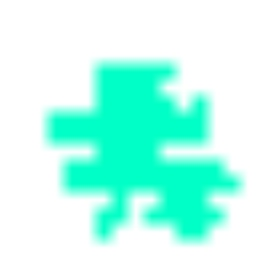

area: tensor([182.,  74.,   0.], device='cuda:0')
perimeter: tensor([72., 72.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -117., -117.,
           0.,    0.,    0., -117.,    2.,    2.,  119.,    0.,    0., -117.,
           2.,    2.,    2.,    0.,    0.,    0., -117.,    2., -117.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


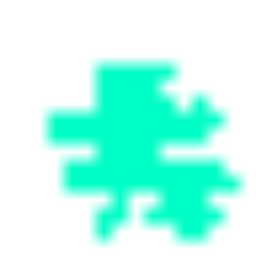

area: tensor([181.,  75.,   0.], device='cuda:0')
perimeter: tensor([74., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
           0.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2., -119.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


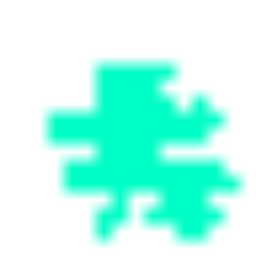

area: tensor([181.,  75.,   0.], device='cuda:0')
perimeter: tensor([74., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  121.,
           0.,    0.,    0.,    0.,    2.,    2.,  121.,    0.,    0.,    0.,
           2.,  121.,    0.,    0.,    0.,    0., -119.,    2.,  121.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


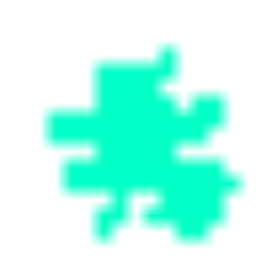

area: tensor([177.,  79.,   0.], device='cuda:0')
perimeter: tensor([72., 72.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,
           2.,    2.,    2.,    0.,    0.,    0., -127.,    2.,    2.,    2.,
           0.,    0.,  129.,    0.,    2.,    0.], device='cuda:0')


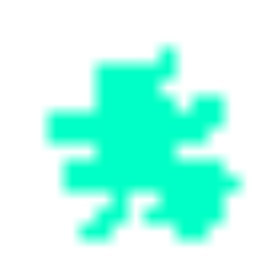

ステップ:  18%|█▊        | 92/500 [00:00<00:02, 161.60it/s]

area: tensor([176.,  80.,   0.], device='cuda:0')
perimeter: tensor([74., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  131.,
           0.,    0.,    0.,    0.,    2.,  131.,  131.,    0.,    0., -129.,
           2.,    2.,    0.,    0.,    0., -129.,    2.,    2.,    2.,    0.,
           0.,    0.,  131.,  131.,    0.,    0.], device='cuda:0')


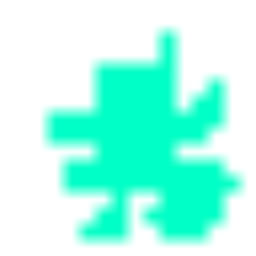

area: tensor([171.,  85.,   0.], device='cuda:0')
perimeter: tensor([76., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -139.,
           0.,    0.,    0.,  141.,    2., -139., -139.,    0.,    0.,    0.,
           2.,    2.,    0.,    0.,    0.,    0.,    2.,    2., -139.,    0.,
           0.,    0.,    0.,  141.,    0.,    0.], device='cuda:0')


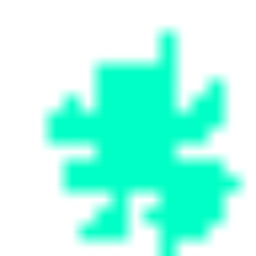

area: tensor([169.,  87.,   0.], device='cuda:0')
perimeter: tensor([79., 80.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -143.,
           0.,    0.,    0.,  145.,    2.,    2.,    2.,    0.,    0., -143.,
           2.,    2.,  145.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    2., -143.,  145.,    0.], device='cuda:0')


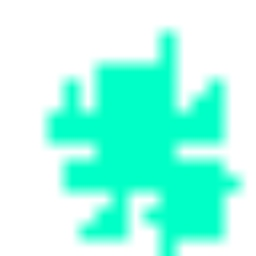

area: tensor([166.,  90.,   0.], device='cuda:0')
perimeter: tensor([81., 82.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,  151., -149.,    2.,
         151.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2., -149.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,  151.,    0.,    0.], device='cuda:0')


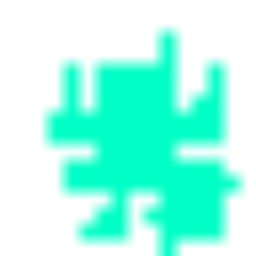

area: tensor([164.,  92.,   0.], device='cuda:0')
perimeter: tensor([85., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  155.,    0.,    0.,    0., -153.,    2.,    2.,
        -153.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    0., -153.,    2., -153.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


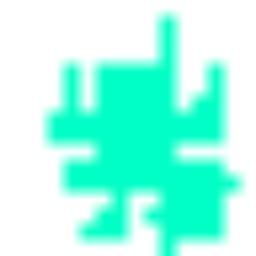

area: tensor([163.,  93.,   0.], device='cuda:0')
perimeter: tensor([87., 88.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  157.,    2.,
           0.,  157.,    0.,    0.,    2.,    2., -155.,    0.,    0.,    0.,
           2.,    2.,    2.,    0.,    0.,    0.,    0.,  157.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


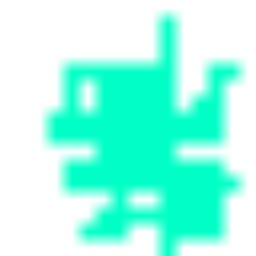

area: tensor([160.,  96.,   0.], device='cuda:0')
perimeter: tensor([89., 90.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0., -161.,    0.,    0.,    0., -161.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2., -161.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,  163.,    0.,    0.], device='cuda:0')


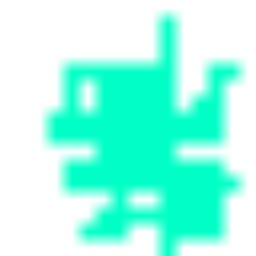

area: tensor([160.,  96.,   0.], device='cuda:0')
perimeter: tensor([89., 90.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -161., -161.,
           0., -161.,    0.,    0., -161.,    2.,    2.,    0.,    0.,    0.,
           2.,    2., -161.,    0.,    0.,    0.,  163., -161.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


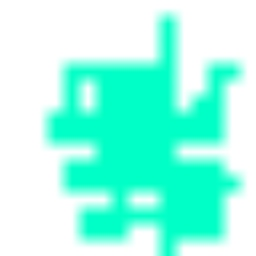

area: tensor([159.,  97.,   0.], device='cuda:0')
perimeter: tensor([89., 90.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   2.,   2.,   0.,   0., 165.,   2.,   2.,   0.,   0.,
          0.,   0., 165.,   0.,   2.,   0.,   0.,   0.,   0., 165.,   0.,   0.],
       device='cuda:0')


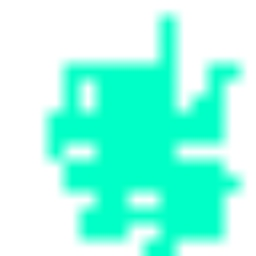

area: tensor([156., 100.,   0.], device='cuda:0')
perimeter: tensor([90., 92.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
           0., -169.,    0.,  171.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2.,    2.,    0.,    0.,    0.,    2., -169.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


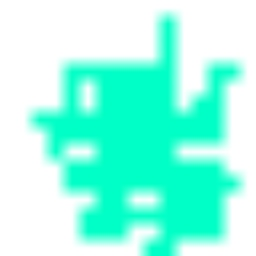

area: tensor([155., 101.,   0.], device='cuda:0')
perimeter: tensor([92., 94.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -171.,
           0.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2., -171.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    2., -171.,    2.,    0.], device='cuda:0')


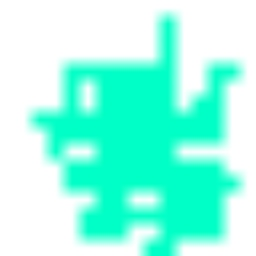

area: tensor([155., 101.,   0.], device='cuda:0')
perimeter: tensor([92., 94.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  173.,    0.,    0.,    0.,    0.,  173.,    2.,
           0.,    0.,    0., -171.,    2.,    2., -171.,    0.,    0.,  173.,
           2., -171.,  173.,    0.,    0.,  173.,    2.,    2.,    2.,    0.,
           0.,    0.,    0., -171.,  173.,    0.], device='cuda:0')


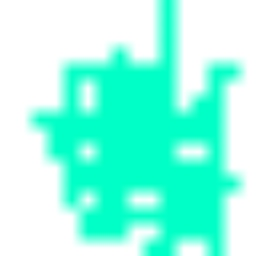

area: tensor([149., 107.,   0.], device='cuda:0')
perimeter: tensor([ 96., 100.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  185.,
           0.,    0.,    0.,    0.,    2.,    2.,  185.,    0.,    0., -183.,
           2.,    2.,    2.,    0.,    0.,  185.,    2.,    2.,    2.,    0.,
           0.,    0., -183.,    0., -183.,    0.], device='cuda:0')


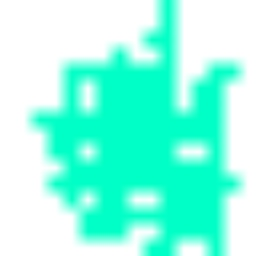

area: tensor([146., 110.,   0.], device='cuda:0')
perimeter: tensor([100., 104.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2., -189.,
           0.,    2.,    0.,    2.,    2.,    2., -189.,    0.,    0.,    0.,
           2.,    2., -189.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


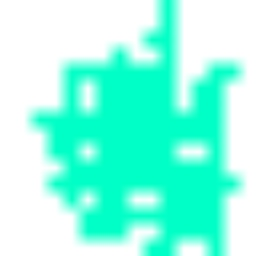

area: tensor([146., 110.,   0.], device='cuda:0')
perimeter: tensor([100., 104.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  191.,
           0.,    0.,    0.,    0.,    0.,    2.,    0.,  191.,    0.,  191.,
           2.,    2.,    2.,  191.,    0.,  191., -189.,    2.,    2., -189.,
           0.,    0., -189.,    0., -189.,  191.], device='cuda:0')


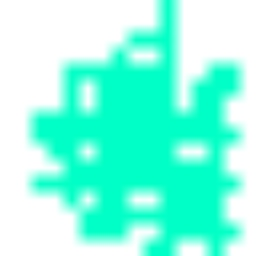

area: tensor([140., 116.,   0.], device='cuda:0')
perimeter: tensor([108., 112.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
           0., -201.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2.,    2.,  203.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


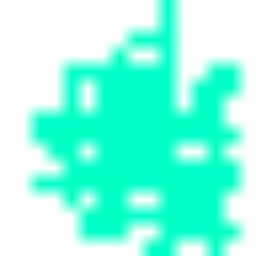

area: tensor([139., 117.,   0.], device='cuda:0')
perimeter: tensor([108., 112.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  205.,  205.,    0.,    0.,    0., -203.,    2.,
         205.,    2.,    0.,    2.,    2.,    2.,    2.,  205.,    0.,    0.,
           2.,    2.,    2.,    2.,    0.,    0.,    2., -203.,    2.,  205.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


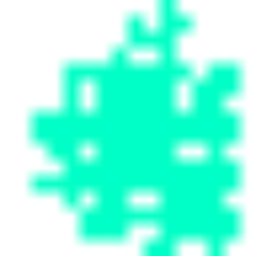

ステップ:  22%|██▏       | 109/500 [00:00<00:02, 164.03it/s]

area: tensor([134., 122.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0., -213.,    0.,    0.,    0., -213.,    2.,    2.,
        -213.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0., -213.,
           2.,    2.,    2.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


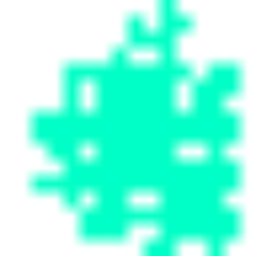

area: tensor([134., 122.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,
           0.,    0.,    0.,    2.,    2., -213.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    2.,    2.,    2.,    0.], device='cuda:0')


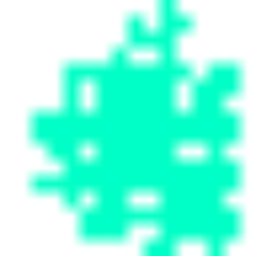

area: tensor([134., 122.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0., -213.,    0.,    0.,    0.,    2.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


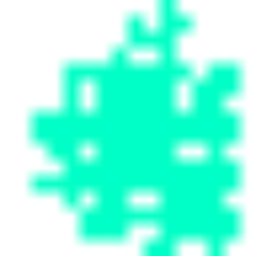

area: tensor([134., 122.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0., -213., -213.,    0.,    0.,    0.,    2.,    2.,
        -213.,    2.,    0., -213.,    2.,    2.,    2., -213.,    0.,    0.,
           2.,    2.,    2.,    2.,    0.,    0., -213.,    2.,    2., -213.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


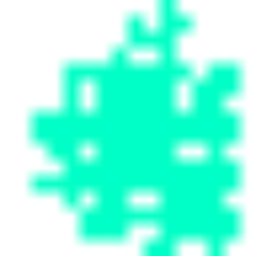

area: tensor([134., 122.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
         215.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2.,    2.,    0.,    0.,    0.,    2., -213.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


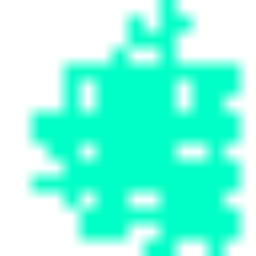

area: tensor([133., 123.,   0.], device='cuda:0')
perimeter: tensor([112., 116.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  217.,    0.,
         217.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    0.,    0.,    0.,  217.,    2.,  217.,    2.,    0.,
           0.,    0.,    0., -215.,    0.,    0.], device='cuda:0')


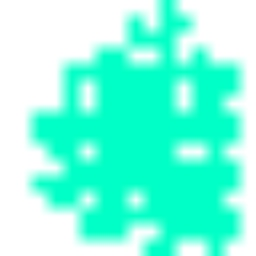

area: tensor([129., 127.,   0.], device='cuda:0')
perimeter: tensor([112., 116.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,
           0.,    0.,    0.,    2.,    2., -223.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,  225., -223., -223.,    2.,    0.], device='cuda:0')


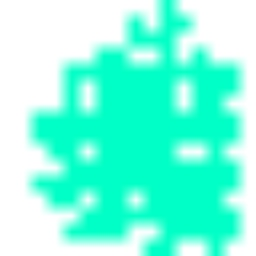

area: tensor([128., 128.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    2., -225.,    0.,    0.,    0.,    2.,    2.,
        -225., -225.,    0., -225.,    2.,    2.,    2., -225.,    0.,    0.,
        -225.,    2., -225.,    2.,    0.,    0.,    2., -225.,    2., -225.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


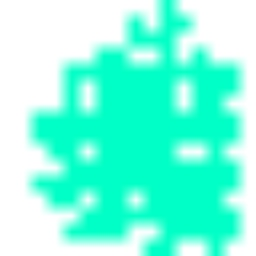

area: tensor([128., 128.,   0.], device='cuda:0')
perimeter: tensor([114., 118.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  227.,  227.,    0.,    0.,    0.,    2., -225.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    0.,
           2.,    2.,    2.,    0.,    0.,  227.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,  227.,    0.,    0.], device='cuda:0')


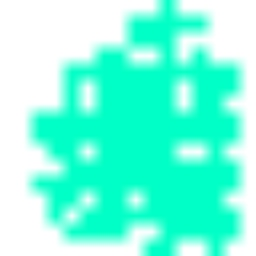

area: tensor([125., 131.,   0.], device='cuda:0')
perimeter: tensor([116., 120.,   0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0., 233.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0., 233.,   0.],
       device='cuda:0')


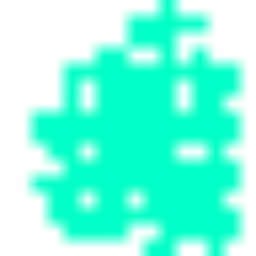

area: tensor([124., 132.,   0.], device='cuda:0')
perimeter: tensor([112., 116.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    2.,    0.,    0.,    0., -233.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


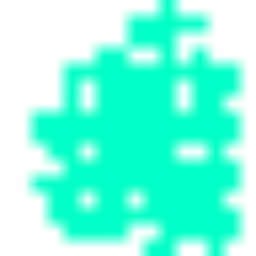

area: tensor([124., 132.,   0.], device='cuda:0')
perimeter: tensor([112., 116.,   0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 235.,   0.,   0.,   0.,   0.,   0.,   0., 235.,
          0.,   0., 235.,   2., 235., 235.,   0., 235., 235.,   2.,   0., 235.,
          0., 235., 235., 235.,   2., 235.,   0.,   0., 235., 235.,   0.,   0.],
       device='cuda:0')


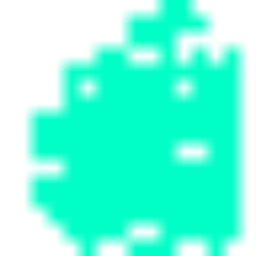

area: tensor([110., 146.,   0.], device='cuda:0')
perimeter: tensor([ 93., 100.,   0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    2.,    0.,    0.,    0.,    0., -261., -261.,
         263.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2., -261., -261.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,  263.,  263., -261.,    2.,    0.], device='cuda:0')


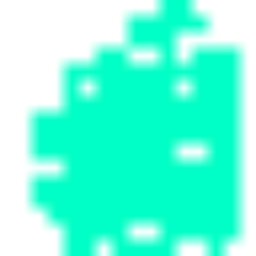

area: tensor([107., 149.,   0.], device='cuda:0')
perimeter: tensor([89., 98.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  269.,    0.,    0.,    0.,    0.,    2.,
           0.,    0.,    0.,    0.,  269.,    2.,  269.,    2.,    0.,    2.,
           2.,    2.,    2., -267.,    0., -267.,    2.,    2.,    2.,    2.,
           0.,    0.,    2.,  269., -267.,    2.], device='cuda:0')


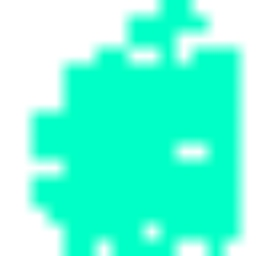

area: tensor([104., 152.,   0.], device='cuda:0')
perimeter: tensor([79., 88.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  275.,    2.,
         275.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    2.,  275., -273.,  275.], device='cuda:0')


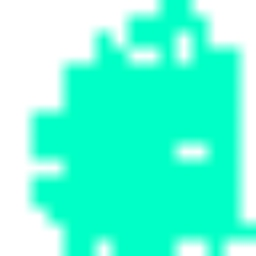

area: tensor([100., 156.,   0.], device='cuda:0')
perimeter: tensor([78., 88.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  283., -281.,
         283.,  283.,    0.,    0.,    2.,    2.,    2.,    2.,    0., -281.,
           2.,    2.,    2.,    2.,    0., -281.,    2.,    2.,    2.,    2.,
           0.,    0.,    2.,    2., -281.,    2.], device='cuda:0')


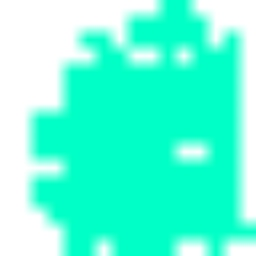

area: tensor([ 97., 159.,   0.], device='cuda:0')
perimeter: tensor([80., 90.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -287., -287.,
           2., -287.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2., -287.,
           0.,    0.,    2.,    2.,    2.,    2.], device='cuda:0')


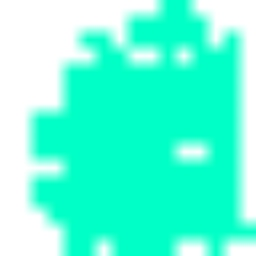

ステップ:  25%|██▌       | 126/500 [00:00<00:02, 164.88it/s]

area: tensor([ 97., 159.,   0.], device='cuda:0')
perimeter: tensor([80., 90.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0., -287.,    0.,    0.,    0.,  289.,    0.,
         289.,    2.,    0.,  289.,    2.,    2.,    2.,    2.,    0., -287.,
           2.,    2.,  289., -287.,    0., -287.,    2.,    2.,    2.,    2.,
           0.,    0.,    2.,    2.,    0.,    0.], device='cuda:0')


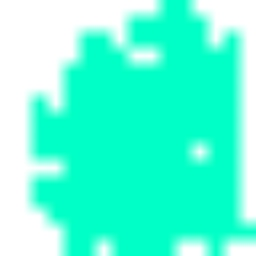

area: tensor([ 93., 163.,   0.], device='cuda:0')
perimeter: tensor([74., 84.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  297., -295.,    2.,  297.,    0.,    0.,    2.,    2.,
           2., -295.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    0.,
           2.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,  297.,    0.,    0.], device='cuda:0')


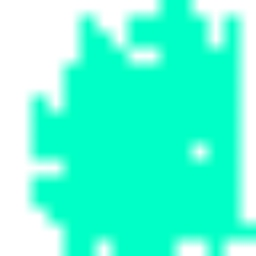

area: tensor([ 91., 165.,   0.], device='cuda:0')
perimeter: tensor([78., 88.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -299.,    2.,
        -299.,    0.,    0.,    0.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,  301.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    0., -299.,    2., -299., -299.], device='cuda:0')


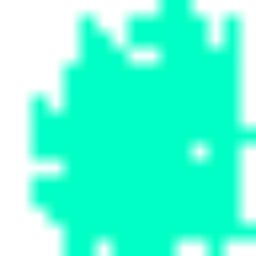

area: tensor([ 90., 166.,   0.], device='cuda:0')
perimeter: tensor([79., 90.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -301.,    2.,
        -301.,    0.,    0.,  303.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2., -301., -301.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,  303.,    2.,    2., -301., -301.], device='cuda:0')


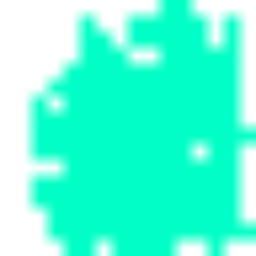

area: tensor([ 88., 168.,   0.], device='cuda:0')
perimeter: tensor([81., 92.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2., -305.,    2.,    2.,    0.,    0.,    2., -305.,
           2.,    2.,    0.,    2.,    2.,    2.,    2., -305.,    0.,  307.,
           2.,    2.,    2., -305.,    0.,  307.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


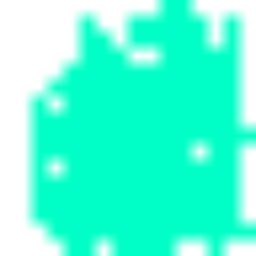

area: tensor([ 86., 170.,   0.], device='cuda:0')
perimeter: tensor([81., 92.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    0.,
           2.,    0.,    0.,  311.,    2.,    2.,    2.,  311.,    0., -309.,
           2.,    2.,  311.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,  311.,  311.,    2.,    0.,    0.], device='cuda:0')


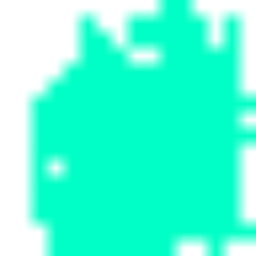

area: tensor([ 81., 175.,   0.], device='cuda:0')
perimeter: tensor([70., 84.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2., -319.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    0.,
           0., -319.,    2.,    2.,    2., -319.], device='cuda:0')


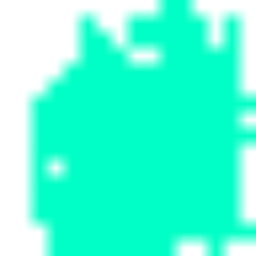

area: tensor([ 81., 175.,   0.], device='cuda:0')
perimeter: tensor([70., 84.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 321.,   0.,   0.,   0.,   2., 321.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2., 321., 321.],
       device='cuda:0')


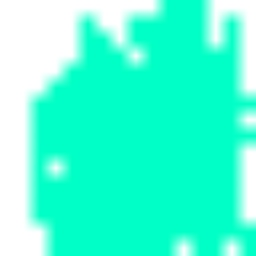

area: tensor([ 77., 179.,   0.], device='cuda:0')
perimeter: tensor([66., 84.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0., 329., 329.,   2., 329.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2., 329.],
       device='cuda:0')


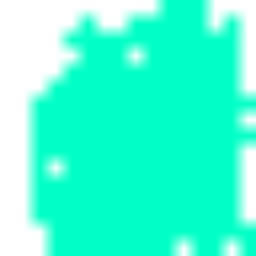

area: tensor([ 74., 182.,   0.], device='cuda:0')
perimeter: tensor([64., 82.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    2.,  335.,    0.,    0.,  335.,    2.,    2.,
           2.,    0.,  335.,    2.,    2.,    2.,    2.,    0.,  335.,    2.,
           2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    2.,    2., -333.,    2.,    0.], device='cuda:0')


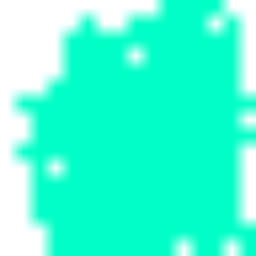

area: tensor([ 70., 186.,   0.], device='cuda:0')
perimeter: tensor([67., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2., -341.,    2., -341.,    0.,    0.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


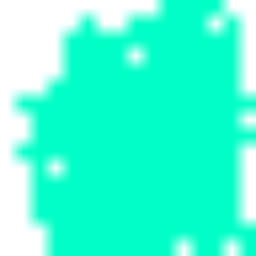

area: tensor([ 70., 186.,   0.], device='cuda:0')
perimeter: tensor([67., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  343.,    0.,    0., -341.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,
           2.,    2.,    2.,  343.,    0.,    2.,    2.,    2.,    2.,    0.,
           0.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


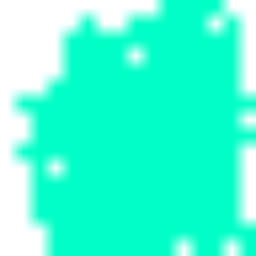

area: tensor([ 70., 186.,   0.], device='cuda:0')
perimeter: tensor([67., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,  343.,    0.,    2.,
           2.,    2.,    2., -341.,    0.,    2.,    2.,    2.,    2.,  343.,
           0.,    2.,    2.,    2.,    2., -341.], device='cuda:0')


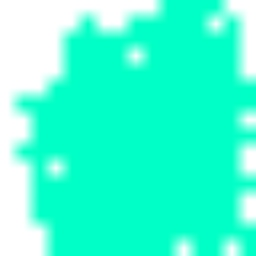

area: tensor([ 68., 188.,   0.], device='cuda:0')
perimeter: tensor([67., 88.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 347.,   2., 347.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


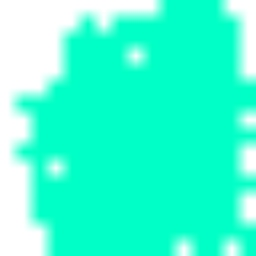

area: tensor([ 66., 190.,   0.], device='cuda:0')
perimeter: tensor([63., 84.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -349.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,
           2., -349.,    0.,    2.,    2.,    2.,    2.,    2.,    0., -349.,
           2.,    2.,    2., -349.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,  351.,    0.,    0.], device='cuda:0')


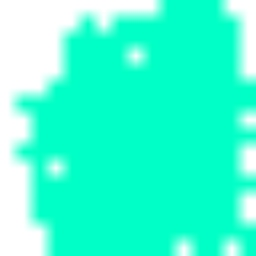

area: tensor([ 66., 190.,   0.], device='cuda:0')
perimeter: tensor([63., 84.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2., 351., 351.,   2.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


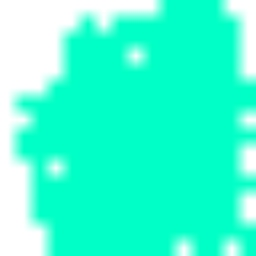

area: tensor([ 65., 191.,   0.], device='cuda:0')
perimeter: tensor([63., 84.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  353.,    2.,    0.,    0.,    0.,    2.,    2.,
           2.,    0.,  353.,    2.,    2.,    2.,    2., -351.,    0., -351.,
           2.,    2.,    2.,  353.,    0.,    2.,    2.,    2.,    2.,    0.,
           0., -351., -351.,    2., -351., -351.], device='cuda:0')


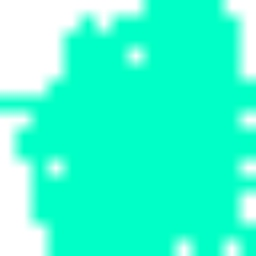

ステップ:  29%|██▊       | 143/500 [00:00<00:02, 164.35it/s]

area: tensor([ 62., 194.,   0.], device='cuda:0')
perimeter: tensor([62., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,
           2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,  359.,    2.,    2., -357.,    2.], device='cuda:0')


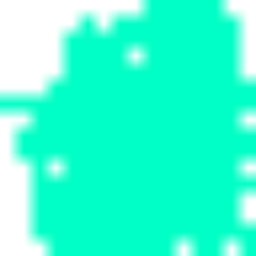

area: tensor([ 61., 195.,   0.], device='cuda:0')
perimeter: tensor([62., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -359.,    2.,    2., -359.,    0.,    0.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0., -359.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,  361.,    0.,    0.,    0.], device='cuda:0')


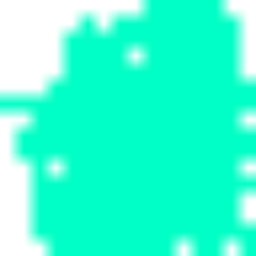

area: tensor([ 61., 195.,   0.], device='cuda:0')
perimeter: tensor([62., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    2.,    2.,    0.,    0.,    0.,    2.,    2.,
           2.,    0., -359.,    2.,    2.,    2.,    2., -359.,    0.,    2.,
           2.,    2.,    2., -359.,    0.,    2.,    2.,    2.,    2.,  361.,
           0., -359.,    2.,    2.,    2., -359.], device='cuda:0')


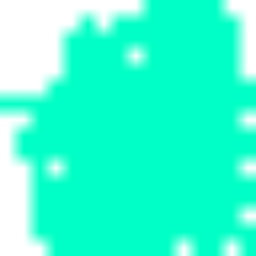

area: tensor([ 60., 196.,   0.], device='cuda:0')
perimeter: tensor([61., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    2., -361.,
           2.,    2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


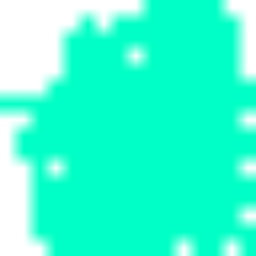

area: tensor([ 60., 196.,   0.], device='cuda:0')
perimeter: tensor([61., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -361.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2., -361.,    0., -361.,
           2.,    2.,    2.,    2.,    0., -361.,    2.,    2.,    2.,    2.,
           0.,    0.,  363.,    0.,    0.,    0.], device='cuda:0')


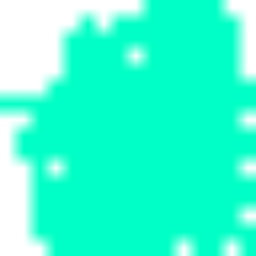

area: tensor([ 60., 196.,   0.], device='cuda:0')
perimeter: tensor([61., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2., -361.,    0.,    0.,    2.,    2.,
           2.,    2.,    0., -361.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


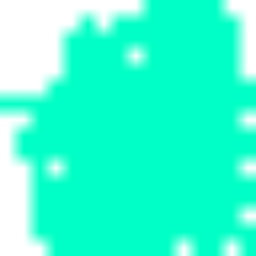

area: tensor([ 60., 196.,   0.], device='cuda:0')
perimeter: tensor([61., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -361., -361.,    2., -361.,    0.,    0.,    2., -361.,
           2., -361.,    0.,    2.,    2.,    2.,    2.,    2.,    0., -361.,
           2.,    2.,    2.,    2.,    0., -361.,    2.,    2.,    2., -361.,
           0.,    0.,  363.,  363.,    0.,    0.], device='cuda:0')


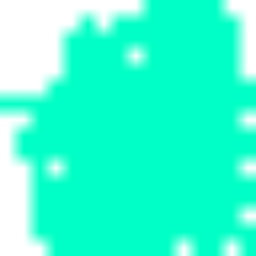

area: tensor([ 60., 196.,   0.], device='cuda:0')
perimeter: tensor([61., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  363., -361.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,
           2.,    0.,    0.,    2.,    2.,    2.,    2.,    0.,  363., -361.,
           2.,    2.,    2.,    0.,  363.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


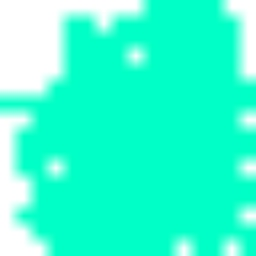

area: tensor([ 57., 199.,   0.], device='cuda:0')
perimeter: tensor([63., 88.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 369.,   2.,   2.,   0.,   0.,   0.,   2.,   2.,   2.,   0.,
        369.,   2.,   2.,   2.,   2., 369.,   0., 369.,   2.,   2.,   2.,   0.,
          0.,   2.,   2.,   2.,   2., 369.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


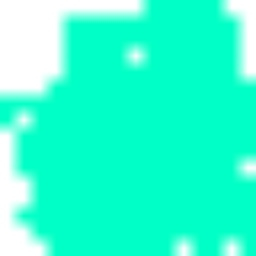

area: tensor([ 52., 204.,   0.], device='cuda:0')
perimeter: tensor([52., 80.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  379.,  379.,    2., -377.,    0.,    0.,    2.,    2.,    2.,
           2.,    0., -377.,    2.,    2.,    2.,    2.,    0., -377.,    2.,
           2.,    2.,    2.,  379.,  379.,    2.,    2.,    2.,    2.,    0.,
           0.,    2.,    2., -377., -377.,    0.], device='cuda:0')


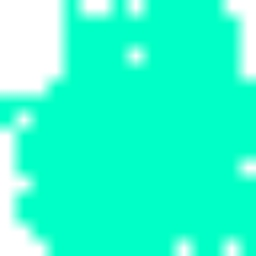

area: tensor([ 49., 207.,   0.], device='cuda:0')
perimeter: tensor([54., 84.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0., -383.,    2.,    0.,    0.,  385.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2., -383., -383.], device='cuda:0')


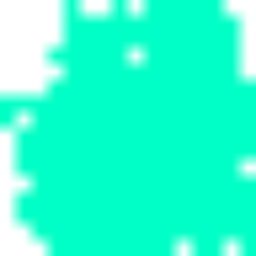

area: tensor([ 48., 208.,   0.], device='cuda:0')
perimeter: tensor([56., 86.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  387.,    2.,    0.,    0.,    0.,    2.,  387.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,  387., -385.,    2.,  387.,  387.], device='cuda:0')


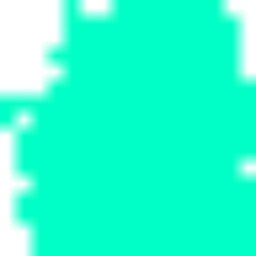

area: tensor([ 43., 213.,   0.], device='cuda:0')
perimeter: tensor([42., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  397.,    2.,    2.,    0.,    0., -395.,    2.,    2.,
           2.,    0., -395.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2., -395.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2., -395., -395.,    2.], device='cuda:0')


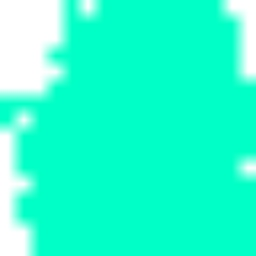

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -397.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,
           2.,    0., -397.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           0.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


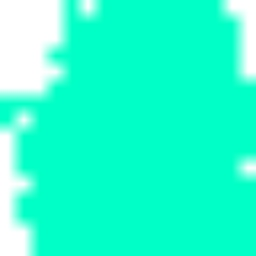

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 2., 2., 0., 0., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
        0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.],
       device='cuda:0')


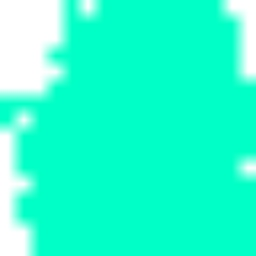

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2., -397.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


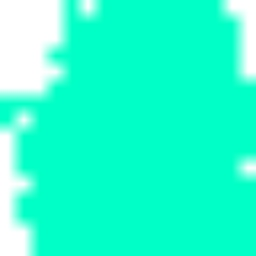

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -397.,    2., -397.,    2.,    0.,    0.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0., -397.,    2.,
           2.,    2.,    2.,  399., -397.,    2.,    2.,    2.,    2.,    0.,
           0.,    2.,    2.,    2.,    2.,  399.], device='cuda:0')


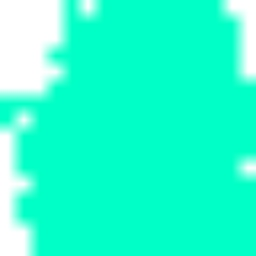

ステップ:  32%|███▏      | 160/500 [00:01<00:02, 164.74it/s]

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 399.,   0.,   0.,   0.],
       device='cuda:0')


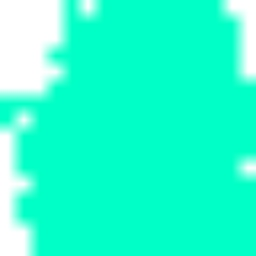

area: tensor([ 42., 214.,   0.], device='cuda:0')
perimeter: tensor([41., 76.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    0.,    0.,  399.,    2.,    2.,
           2.,  399., -397.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,  399.,  399.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,  399.], device='cuda:0')


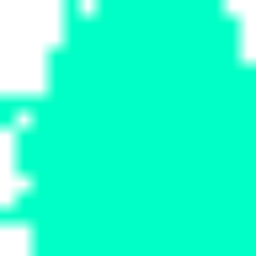

area: tensor([ 38., 218.,   0.], device='cuda:0')
perimeter: tensor([36., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  407.,    2.,    2.,  407.,    0.,  407.,    2.,    2.,
           2.,    2.,    0., -405.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2., -405., -405.], device='cuda:0')


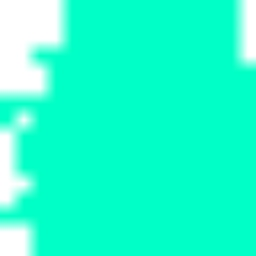

area: tensor([ 35., 221.,   0.], device='cuda:0')
perimeter: tensor([34., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2., -411.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2., -411.], device='cuda:0')


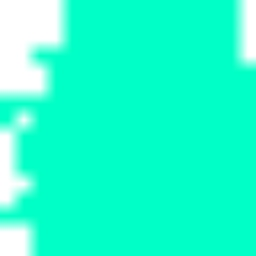

area: tensor([ 35., 221.,   0.], device='cuda:0')
perimeter: tensor([34., 74.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 413.,   0., 413.,   0.,   0.],
       device='cuda:0')


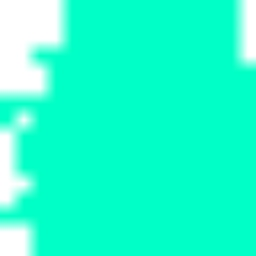

area: tensor([ 35., 221.,   0.], device='cuda:0')
perimeter: tensor([34., 74.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 413.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,
          0., 413.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


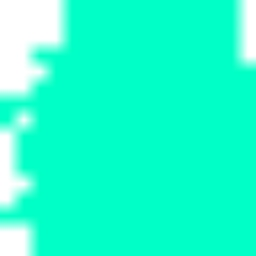

area: tensor([ 34., 222.,   0.], device='cuda:0')
perimeter: tensor([34., 74.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,  415.,    0.,    2.,    2.,    2.,
           2.,  415.,    2.,    2.,    2.,    2.,    2.,    2.,  415.,    2.,
           2.,    2.,    2.,    2.,  415.,    2.,    2.,    2.,    2.,    2.,
           0., -413.,    2.,    2.,    2., -413.], device='cuda:0')


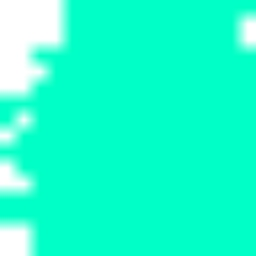

area: tensor([ 30., 226.,   0.], device='cuda:0')
perimeter: tensor([33., 78.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,  423.,    0.,  423.,    2.,    2.,
           2.,  423.,    0.,    2.,    2.,    2.,    2., -421.,  423.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2., -421.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


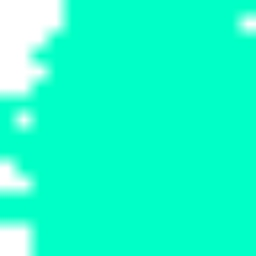

area: tensor([ 27., 229.,   0.], device='cuda:0')
perimeter: tensor([29., 76.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
        429.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 429., 429.,   0.],
       device='cuda:0')


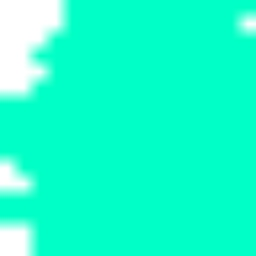

area: tensor([ 26., 230.,   0.], device='cuda:0')
perimeter: tensor([25., 72.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
        431.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
        431.,   2.,   2.,   2.,   2.,   0., 431.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


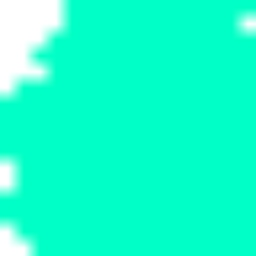

area: tensor([ 23., 233.,   0.], device='cuda:0')
perimeter: tensor([23., 70.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   2.,   2.,   2.,   2.,   0., 437.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        437.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 437.,   0.,   0.,   0.],
       device='cuda:0')


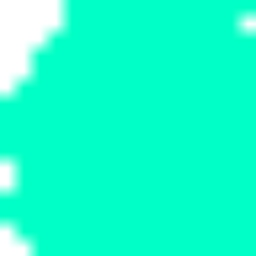

area: tensor([ 22., 234.,   0.], device='cuda:0')
perimeter: tensor([21., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  439.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -437.,    2.,    2., -437.,    2.], device='cuda:0')


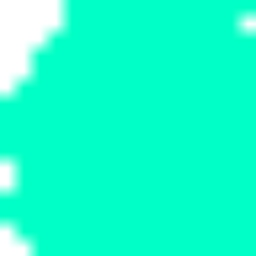

area: tensor([ 22., 234.,   0.], device='cuda:0')
perimeter: tensor([21., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0., 439.,   0., 439.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


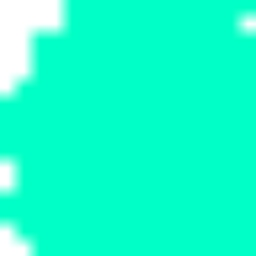

area: tensor([ 21., 235.,   0.], device='cuda:0')
perimeter: tensor([21., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,  441.,    0.,    2.,    2.,    2.,
           2., -439.,    2.,    2.,    2.,    2.,    2., -439.,  441.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


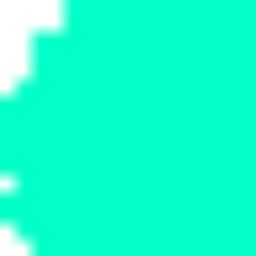

area: tensor([ 19., 237.,   0.], device='cuda:0')
perimeter: tensor([17., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 445.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 445.,   0.,   0.,   0.],
       device='cuda:0')


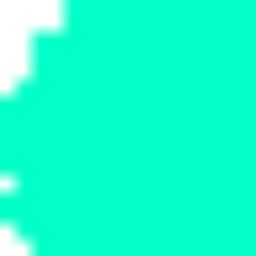

area: tensor([ 19., 237.,   0.], device='cuda:0')
perimeter: tensor([17., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0., -443.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,  445.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


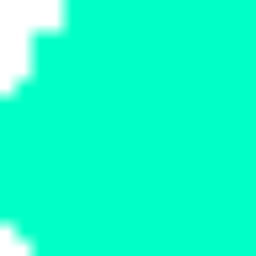

area: tensor([ 18., 238.,   0.], device='cuda:0')
perimeter: tensor([14., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        447.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


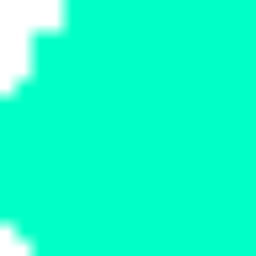

ステップ:  35%|███▌      | 177/500 [00:01<00:01, 164.39it/s]

area: tensor([ 18., 238.,   0.], device='cuda:0')
perimeter: tensor([14., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    2.,    0., -445.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


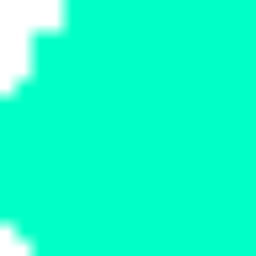

area: tensor([ 18., 238.,   0.], device='cuda:0')
perimeter: tensor([14., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -445.,    2., -445., -445.,    0., -445.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -445., -445.,    2., -445.,    2.], device='cuda:0')


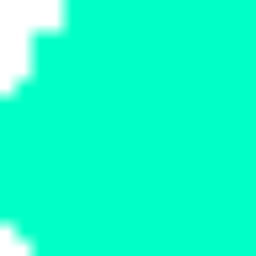

area: tensor([ 18., 238.,   0.], device='cuda:0')
perimeter: tensor([14., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0., -445.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  447.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


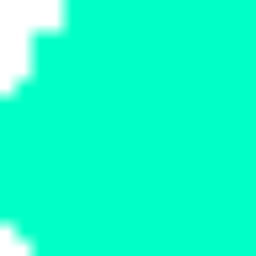

area: tensor([ 18., 238.,   0.], device='cuda:0')
perimeter: tensor([14., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -445.,    2.,    2.,    2.,    0.,    0.,    2.,    2.,    2.,
           2.,  447.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
         447.,    2.,    2., -445.,    2.,    0.], device='cuda:0')


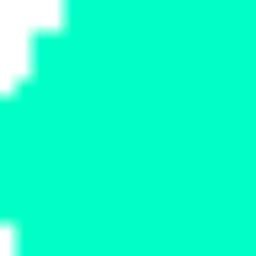

area: tensor([ 17., 239.,   0.], device='cuda:0')
perimeter: tensor([13., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -447., -447., -447., -447.,    0.,    2.,    2.,    2.,
           2., -447.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


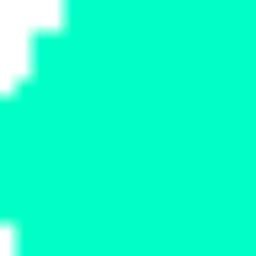

area: tensor([ 17., 239.,   0.], device='cuda:0')
perimeter: tensor([13., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,  449.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2., -447.], device='cuda:0')


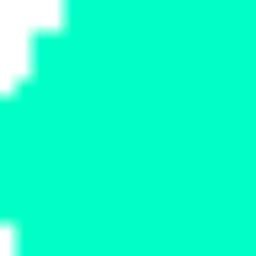

area: tensor([ 17., 239.,   0.], device='cuda:0')
perimeter: tensor([13., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2., -447.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -447., -447.,    2.,
           2.,    2.,    2., -447., -447.,    2.,    2.,    2.,    2.,    2.,
           0., -447.,    2.,    2.,    2.,    2.], device='cuda:0')


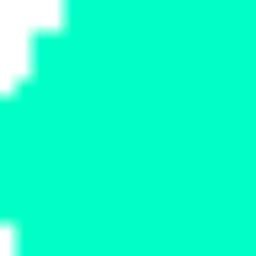

area: tensor([ 17., 239.,   0.], device='cuda:0')
perimeter: tensor([13., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    2.,    0., -447.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


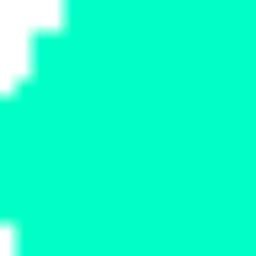

area: tensor([ 17., 239.,   0.], device='cuda:0')
perimeter: tensor([13., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2., -447., -447.,    2.,    2.,    2.,    2., -447.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
         449.,    2.,    2., -447.,    2., -447.], device='cuda:0')


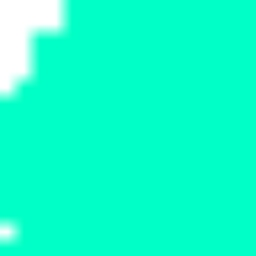

area: tensor([ 16., 240.,   0.], device='cuda:0')
perimeter: tensor([13., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 451.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 451., 451., 451.,   0.,   0.],
       device='cuda:0')


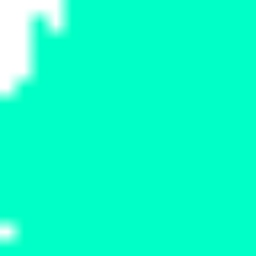

area: tensor([ 15., 241.,   0.], device='cuda:0')
perimeter: tensor([15., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    2.,    2., -451.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -451.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -451., -451.,    2.,    2.,    2.,    2.], device='cuda:0')


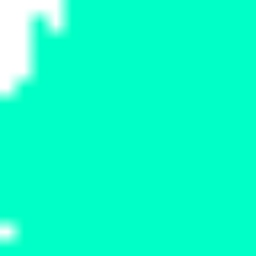

area: tensor([ 15., 241.,   0.], device='cuda:0')
perimeter: tensor([15., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  453.,    0.,    0.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -451.,    2.,    2.,    2.,    2.,    2.,
         453.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


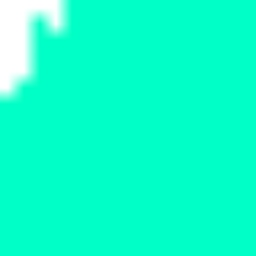

area: tensor([ 14., 242.,   0.], device='cuda:0')
perimeter: tensor([12., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -453.,    2., -453.,    2.,    0.,  455.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  455.,    2.,    2.,
           2.,    2.,    2.,  455.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -453.,    2., -453., -453.,  455.], device='cuda:0')


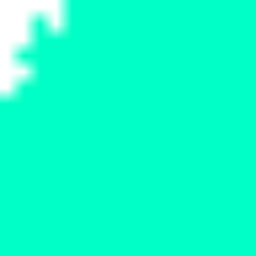

area: tensor([ 13., 243.,   0.], device='cuda:0')
perimeter: tensor([14., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -455.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,  457.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         457.,    2.,    2., -455.,    2.,    2.], device='cuda:0')


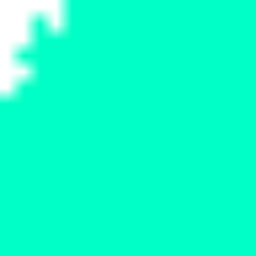

area: tensor([ 13., 243.,   0.], device='cuda:0')
perimeter: tensor([14., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  457.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2., -455.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -455., -455.,    2.,    2.,    2.,    2., -455.,
           0.,  457.,    0.,    0.,    0.,    0.], device='cuda:0')


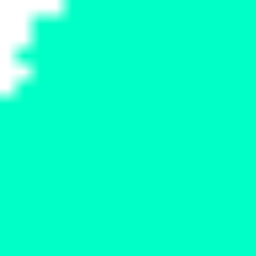

area: tensor([ 12., 244.,   0.], device='cuda:0')
perimeter: tensor([12., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  459.,    0.,    0.,    0.,    2.,    2.,    2.,
           2., -457.,  459.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -457.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


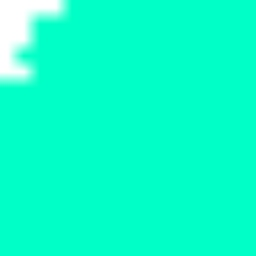

area: tensor([ 11., 245.,   0.], device='cuda:0')
perimeter: tensor([11., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0., -459.,    2., -459.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,  461.,    2.,    2.,    2.,    2.,    2.,  461.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2., -459.,    2.,    2.], device='cuda:0')


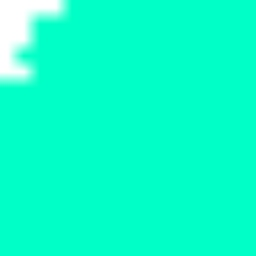

ステップ:  39%|███▉      | 194/500 [00:01<00:01, 164.30it/s]

area: tensor([ 11., 245.,   0.], device='cuda:0')
perimeter: tensor([11., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  461., -459.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  461.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2., -459.,    2.,    2.,    2.], device='cuda:0')


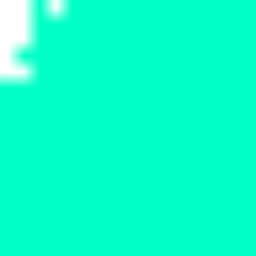

area: tensor([ 10., 246.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 463., 463., 463.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


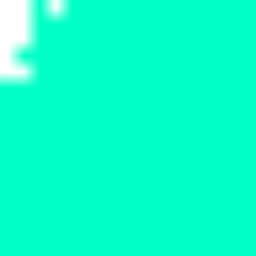

area: tensor([ 10., 246.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 463.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 463.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


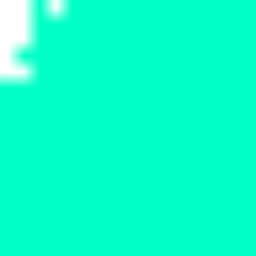

area: tensor([ 10., 246.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,
           2., -461., -461.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -461., -461.,    2.,    2.,    2.,    2., -461.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


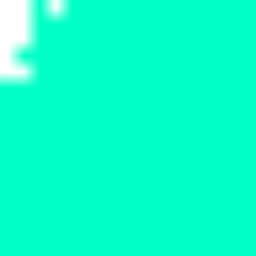

area: tensor([ 10., 246.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0., 463.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 463.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


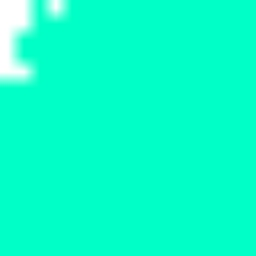

area: tensor([  9., 247.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -463.,    2.,    2.,    2.,    2.,    2.,
         465.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


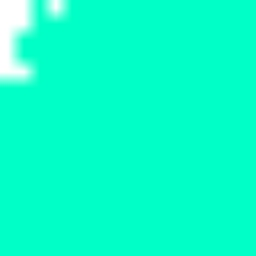

area: tensor([  9., 247.,   0.], device='cuda:0')
perimeter: tensor([12., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  465., -463.,    2.,    2., -463.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -463.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -463.,    2.,    2.,    2.,    2., -463.], device='cuda:0')


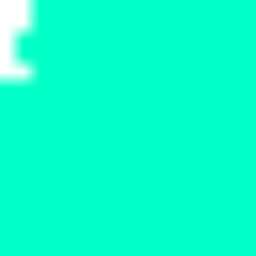

area: tensor([  8., 248.,   0.], device='cuda:0')
perimeter: tensor([ 9., 66.,  0.], device='cuda:0')
delta_H_area: tensor([467.,   2.,   2.,   2.,   2.,   0., 467.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0., 467.,   0.,   0., 467.,   0.,   0.],
       device='cuda:0')


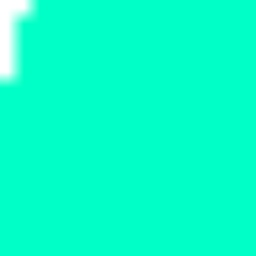

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        471.,   2.,   2.,   2.,   2.,   2., 471.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 471.,   0.,   0., 471.],
       device='cuda:0')


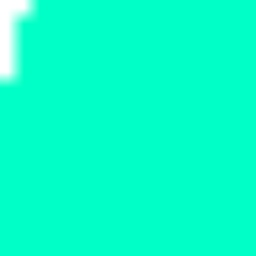

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  471.,    0.,    0.,    0.,    2.,    2.,    2.,
           2.,    2., -469.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -469.,    2.,    2.,    2.,    2.,    2.,    2.,
        -469.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


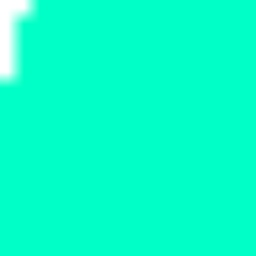

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -469.,    2., -469., -469.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         471.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


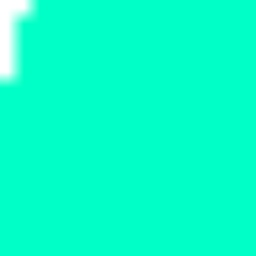

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 471.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


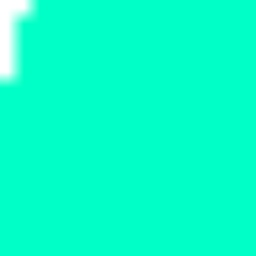

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-469.,    2.,    2.,    2.,    2.,    0., -469.,    2.,    2.,    2.,
           2.,  471.,    2.,    2.,    2.,    2.,    2.,  471.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,  471.,    0.], device='cuda:0')


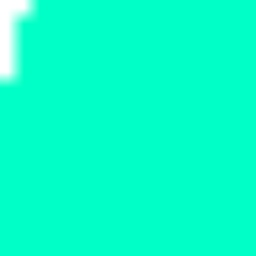

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2., -469.,    2., -469., -469.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -469.,    2.,
           2.,    2.,    2., -469.,    2.,    2.,    2.,    2.,    2.,    2.,
        -469.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


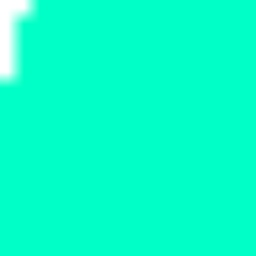

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-469.,    2.,    2.,    2.,    2.,    0., -469.,    2.,    2.,    2.,
           2.,  471.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           0.,    0.,    0.,    0.,  471.,    0.], device='cuda:0')


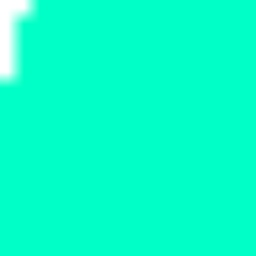

area: tensor([  6., 250.,   0.], device='cuda:0')
perimeter: tensor([ 7., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 471., -469.,    2.,    2., -469.,  471.,    2.,    2.,    2.,    2.,
           2.,  471.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  471.,
           2.,    2.,    2.,    2.,    2.,  471.], device='cuda:0')


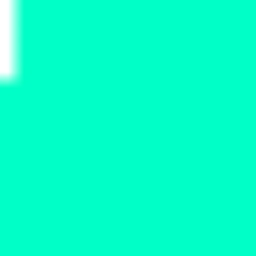

area: tensor([  5., 251.,   0.], device='cuda:0')
perimeter: tensor([ 6., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2., -471., -471.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,  473.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2., -471.,    2.], device='cuda:0')


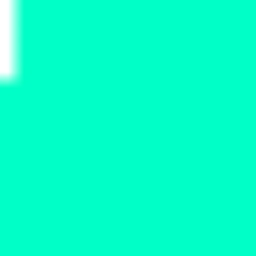

ステップ:  42%|████▏     | 211/500 [00:01<00:01, 163.57it/s]

area: tensor([  5., 251.,   0.], device='cuda:0')
perimeter: tensor([ 6., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 473., 473.,   0.,   0., 473.],
       device='cuda:0')


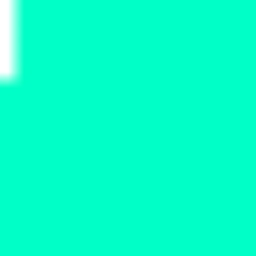

area: tensor([  5., 251.,   0.], device='cuda:0')
perimeter: tensor([ 6., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -471., -471.,    2.,
           2.,    2.,    2., -471.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,  473.,    0.,  473.], device='cuda:0')


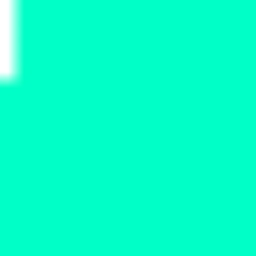

area: tensor([  5., 251.,   0.], device='cuda:0')
perimeter: tensor([ 6., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  473.,    0.,    0.,    0.,    0.,  473.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -471.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


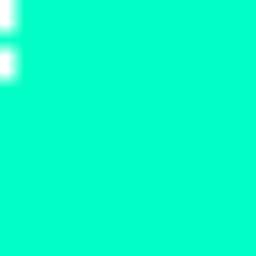

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2., -473.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2., -473.,    2.,    2.,    2.,    2., -473.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -473., -473.,    2.,    2.,    2., -473.], device='cuda:0')


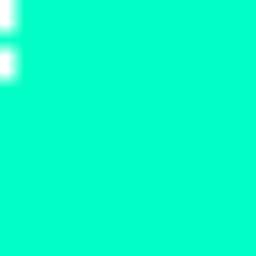

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 475.,   2.,   2.,   2.,   2.,   2.,
        475.,   2.,   2.,   2.,   2.,   2.,   0., 475.,   0.,   0., 475.,   0.],
       device='cuda:0')


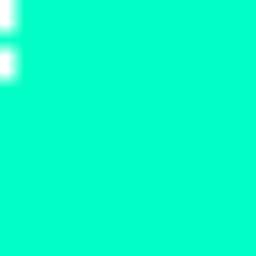

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  475.,    0.,    0.,    0.,    0., -473.,    2.,    2.,    2.,
           2., -473., -473.,    2.,    2.,    2.,    2.,    2., -473.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


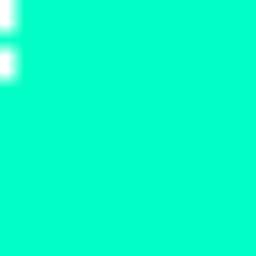

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([-473.,    2.,    2.,    2.,    2.,  475.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
         475.,  475.,    0.,    0.,  475.,    0.], device='cuda:0')


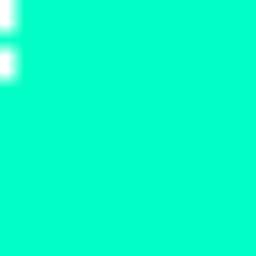

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        475.,   2.,   2.,   2.,   2.,   2., 475.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 475., 475., 475.],
       device='cuda:0')


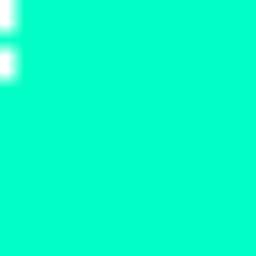

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([-473.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,  475.,    2.,    2.,    2.,    2.,    2.,  475.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
         475.,    0.,  475.,    0.,  475.,    0.], device='cuda:0')


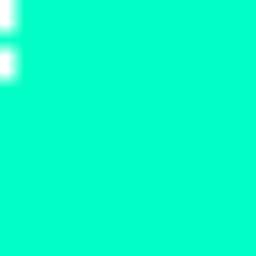

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2., -473., -473.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2.,    2.,    2., -473.], device='cuda:0')


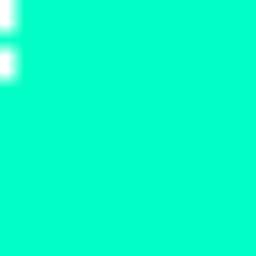

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([-473.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2., -473.,    2., -473.,    0.], device='cuda:0')


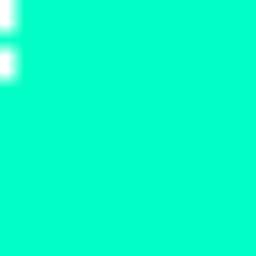

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  475.,    0.,    0., -473.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


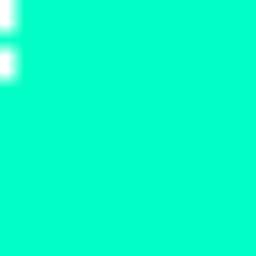

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 475., 475.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


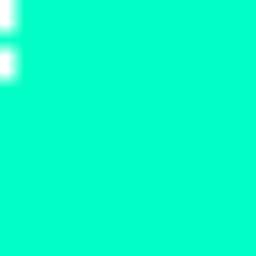

area: tensor([  4., 252.,   0.], device='cuda:0')
perimeter: tensor([ 7., 66.,  0.], device='cuda:0')
delta_H_area: tensor([ 475.,    2.,    2.,    2.,    2., -473.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -473., -473.,    2.,    2.,    2., -473.], device='cuda:0')


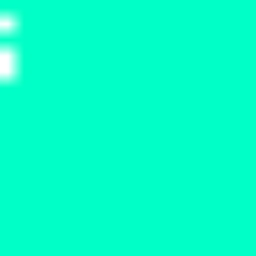

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2., -475., -475.,    2., -475.], device='cuda:0')


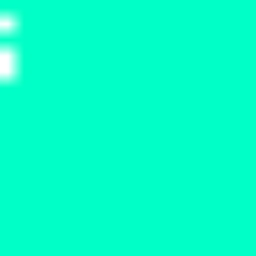

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0., -475.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -475.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


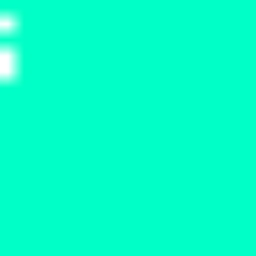

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  477.,    0.,    0.,    0.,    0., -475.,    2.,    2.,    2.,
           2., -475.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


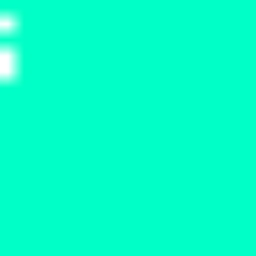

ステップ:  46%|████▌     | 228/500 [00:01<00:01, 161.53it/s]

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -475.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  477.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2.,    2.,  477.], device='cuda:0')


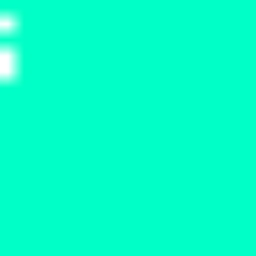

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([ 477., -475.,    2., -475.,    2., -475.,    0.,    2.,    2.,    2.,
           2.,    2.,  477.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -475.,    2., -475.,    2.,    2.], device='cuda:0')


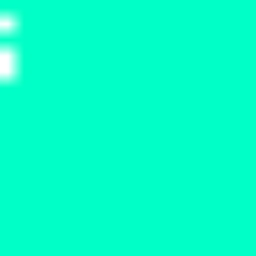

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -475.,    2.,    2.,    2., -475.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  477.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2.,    2., -475.,    2.,    2.], device='cuda:0')


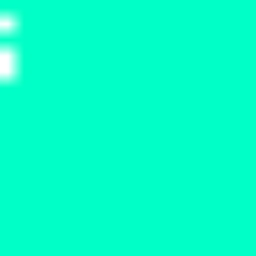

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -475.,
         477.,    0.,    0.,    0.,    0.,  477.], device='cuda:0')


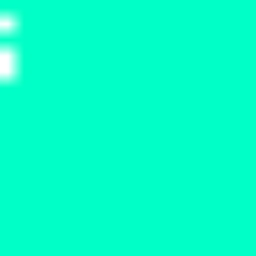

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -475.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
        -475.,    2.,    2.,    2., -475.,    0.], device='cuda:0')


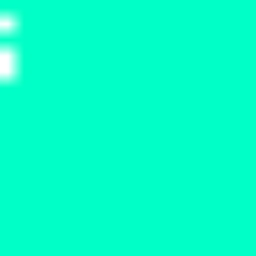

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([477.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        477.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        477.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


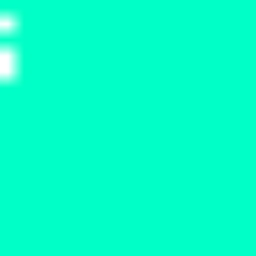

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 477., 477.,   0.,   0., 477.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 477.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


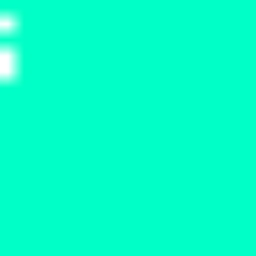

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([ 477.,    2.,    2.,    2., -475., -475.,    0.,    2.,    2.,    2.,
           2.,    2.,  477.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         477., -475., -475.,    2.,    2., -475.], device='cuda:0')


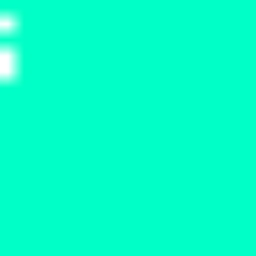

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([ 477.,    0.,    0.,  477.,    0.,    0., -475.,    2.,    2.,    2.,
           2.,    2., -475.,    2.,    2.,    2.,    2., -475.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


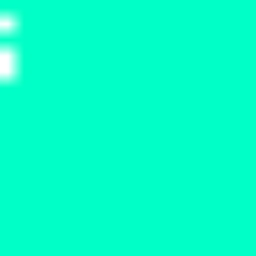

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 477.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


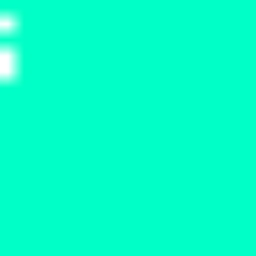

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -475., -475.,    2.,  477.,    2.,    2.,    2.,    2.,
           2.,  477.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,  477.,    2.,    2.,    2.,    2.,    2.,  477.,
           2., -475.,    2.,    2.,    2.,    0.], device='cuda:0')


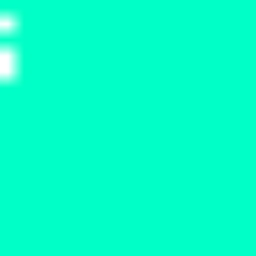

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  477.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
        -475., -475.,    2.,    2.,    2.,    0.], device='cuda:0')


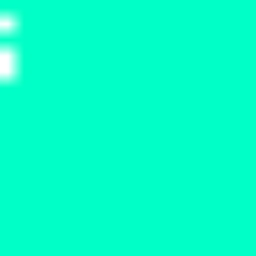

area: tensor([  3., 253.,   0.], device='cuda:0')
perimeter: tensor([ 7., 68.,  0.], device='cuda:0')
delta_H_area: tensor([477.,   2.,   2.,   2.,   2.,   2., 477.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 477.,   0.,   0.],
       device='cuda:0')


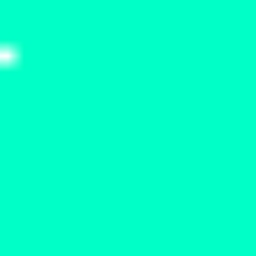

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 481.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0., 481.,   0., 481., 481., 481.,   0.],
       device='cuda:0')


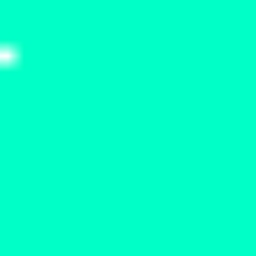

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0., 481.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


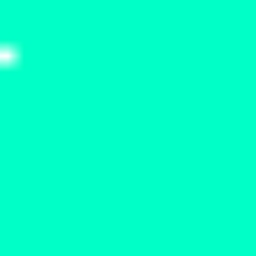

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 481.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


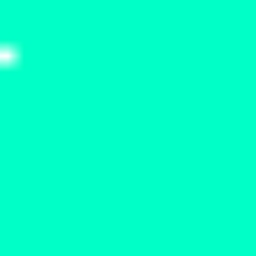

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 481., 481., 481., 481.,   0.,   0.,   0.],
       device='cuda:0')


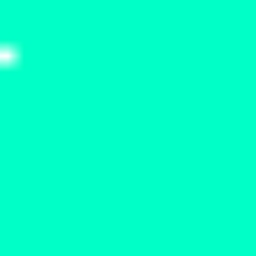

ステップ:  49%|████▉     | 245/500 [00:01<00:01, 161.64it/s]

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([481., 481.,   0., 481.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 481.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


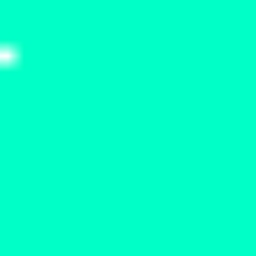

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -479.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -479., -479.,    2.,    2.,    2.,    2., -479.,
         481.,  481.,  481.,    0.,    0.,  481.], device='cuda:0')


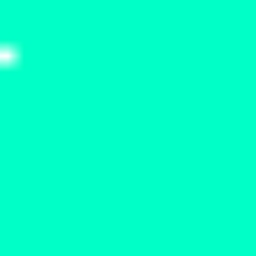

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -479.,    2.,    2.,    2.,    2., -479., -479.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


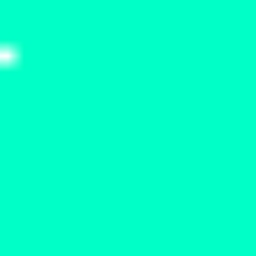

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -479.,    2.,    2.,    2.,
           2.,    2., -479.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,  481.,    0.,    0.,    0.,    0.], device='cuda:0')


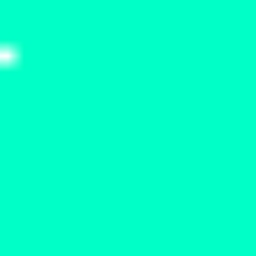

area: tensor([  1., 255.,   0.], device='cuda:0')
perimeter: tensor([ 3., 66.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -479.,  481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -479.,    2.,
           2.,    2.,    2., -479., -479.,    2.,    2.,    2.,    2.,    2.,
        -479.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


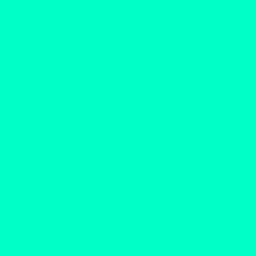

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


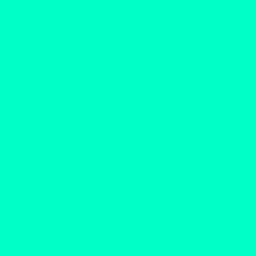

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


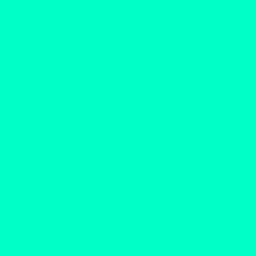

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483., 483., 483.,   0.,   0.],
       device='cuda:0')


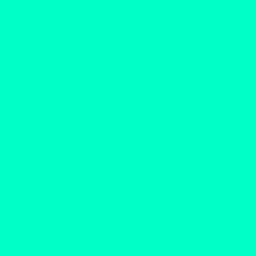

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
         483.,    0.,    0.,  483.,    0.,  483.], device='cuda:0')


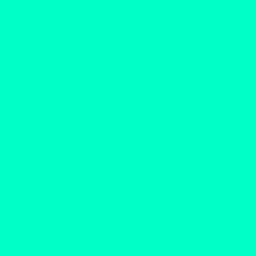

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


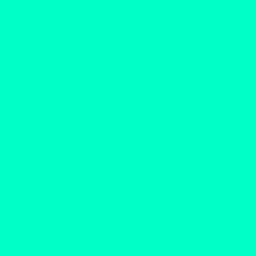

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2., -481.,    2., -481., -481.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -481.,    2., -481.,    2.,    2.], device='cuda:0')


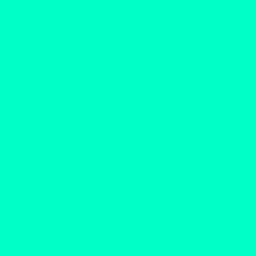

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


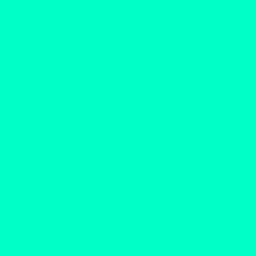

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


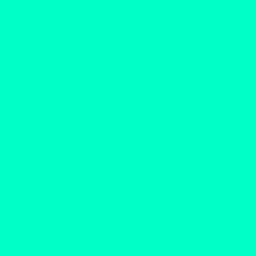

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


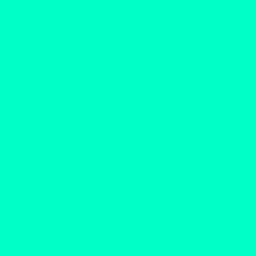

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,  483.,
        -481., -481., -481.,    2.,    2.,  483.], device='cuda:0')


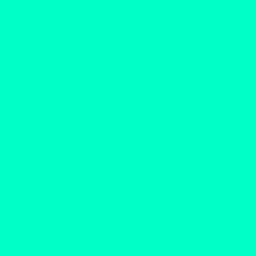

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


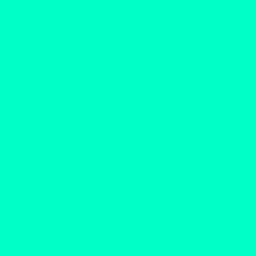

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           0.,    0.,    0.,  483.,  483.,    0.], device='cuda:0')


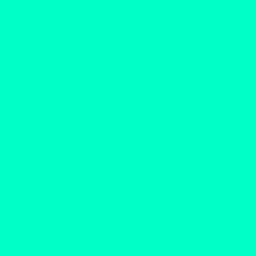

ステップ:  52%|█████▏    | 262/500 [00:01<00:01, 161.05it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


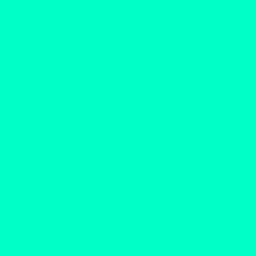

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  483.,    0.,  483., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


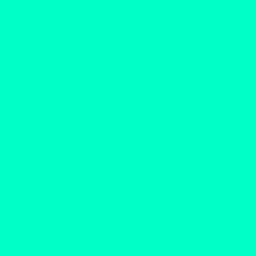

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,    2.,
         483.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


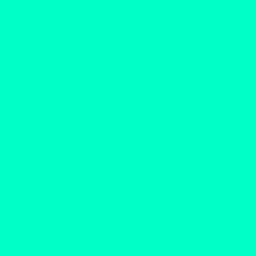

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


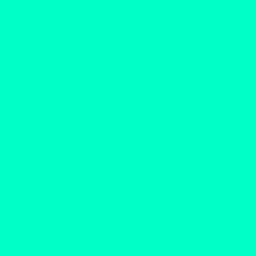

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,
           2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -481.,    2., -481.,    2.,  483.], device='cuda:0')


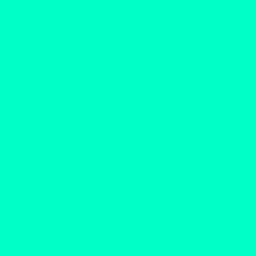

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


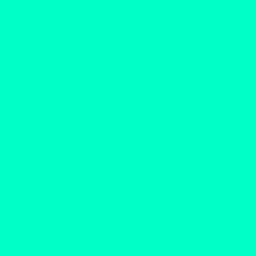

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


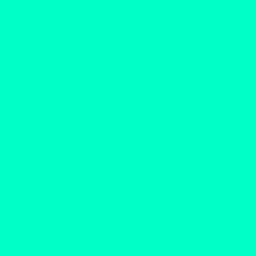

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


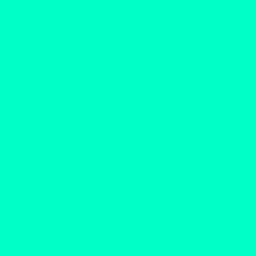

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


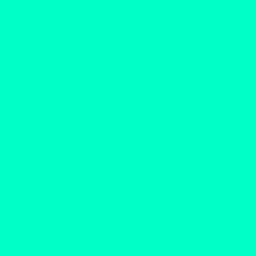

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,  483.,    0.,  483., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


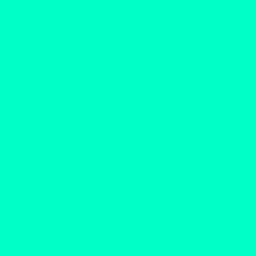

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,  483.,    0.,    0.], device='cuda:0')


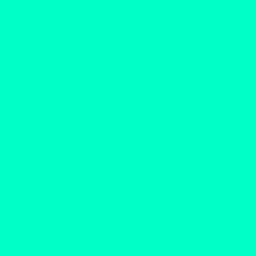

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483., 483.,   0.],
       device='cuda:0')


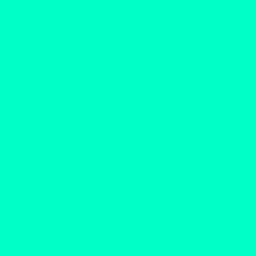

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


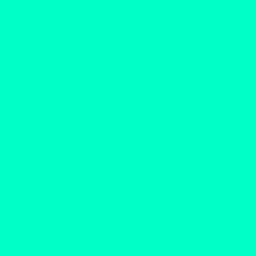

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2.,    2., -481.,    2.], device='cuda:0')


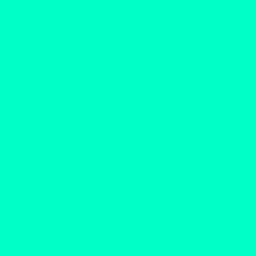

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


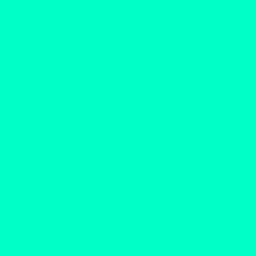

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,    2.,
           0.,  483.,    0.,    0.,    0.,    0.], device='cuda:0')


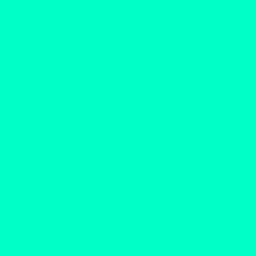

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


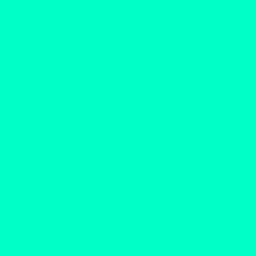

ステップ:  56%|█████▌    | 279/500 [00:01<00:01, 160.40it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,  483.,
           2.,    2.,    2., -481.,    2.,  483.], device='cuda:0')


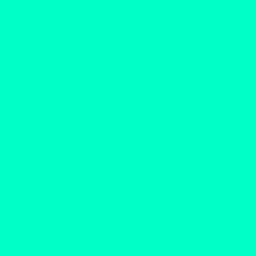

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


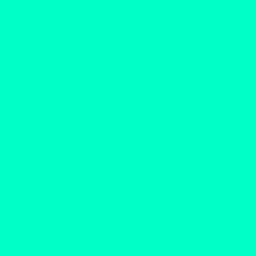

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.], device='cuda:0')


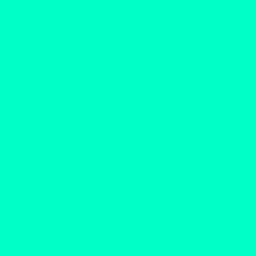

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


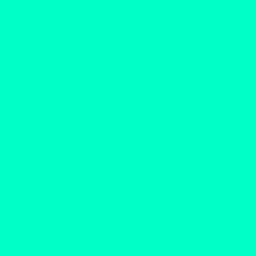

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


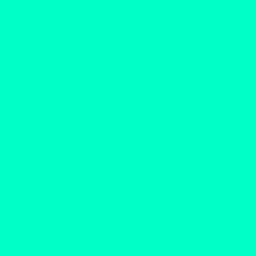

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -481.,    2., -481.,    2., -481.,  483.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2., -481.,    2.,    2.,    2.], device='cuda:0')


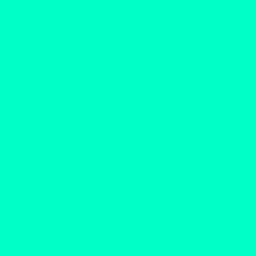

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


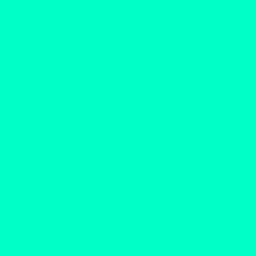

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


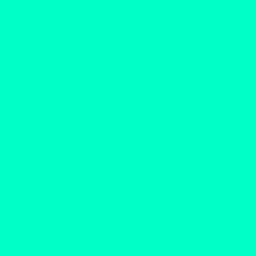

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    2., -481.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


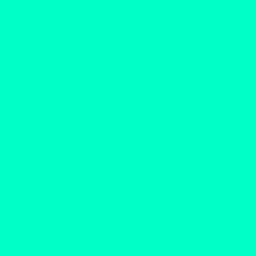

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,  483.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


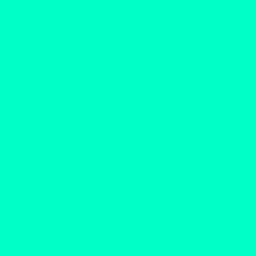

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    2.,    2.,    2., -481.,    2.,  483.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


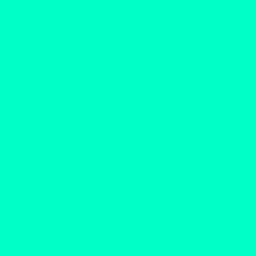

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2., -481.,    2.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -481.,    2.,    2.,    2.,  483.], device='cuda:0')


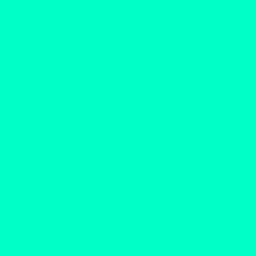

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


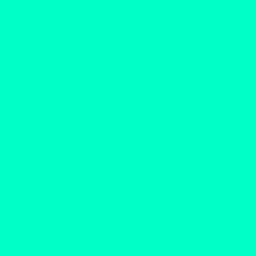

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481.,    2.,    2.,    2., -481., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481., -481., -481.,    2.], device='cuda:0')


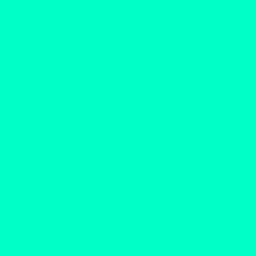

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0.,
        2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


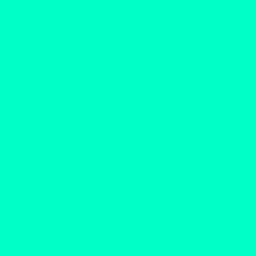

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


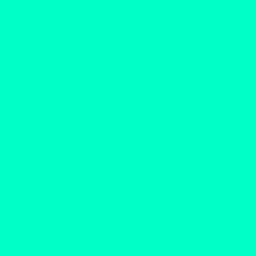

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483., 483., 483., 483.,   0.,   0.,   0.],
       device='cuda:0')


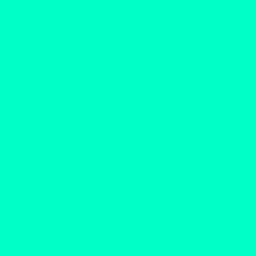

ステップ:  59%|█████▉    | 296/500 [00:01<00:01, 159.50it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


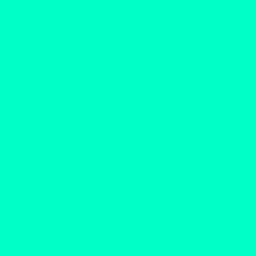

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


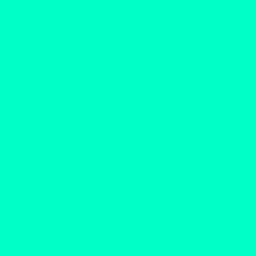

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


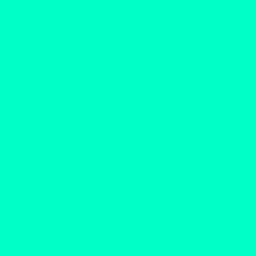

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


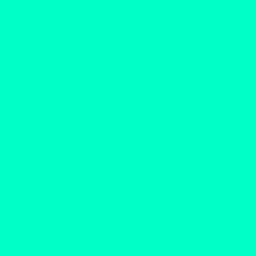

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


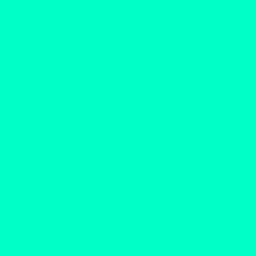

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


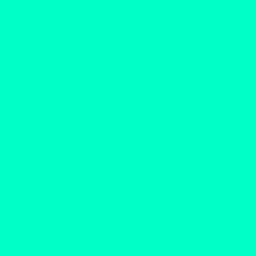

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


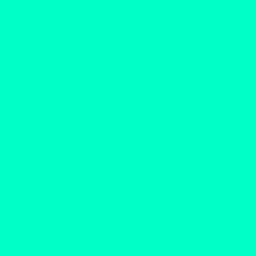

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0., 483., 483.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


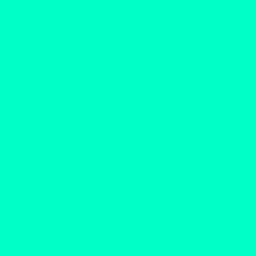

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


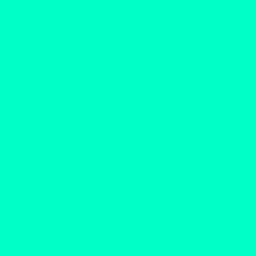

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


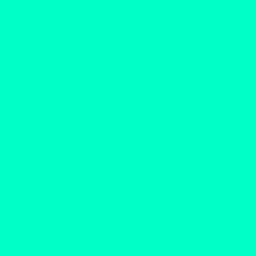

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


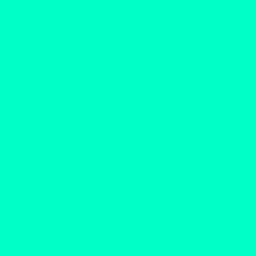

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481., -481.,    2.,    2., -481.], device='cuda:0')


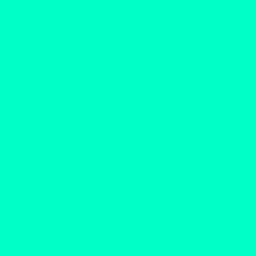

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2., -481.,    2.,    2.,    0.], device='cuda:0')


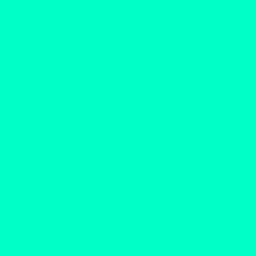

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


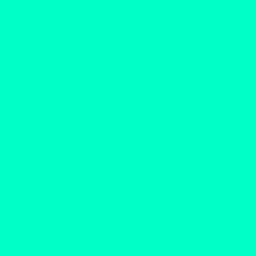

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  483.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


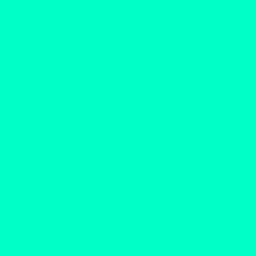

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


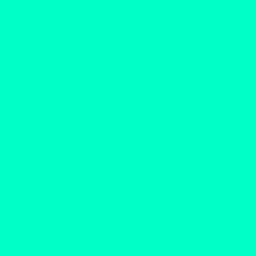

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483.,   0.,   0.,   0., 483.],
       device='cuda:0')


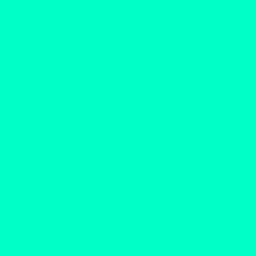

ステップ:  63%|██████▎   | 313/500 [00:02<00:01, 160.51it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


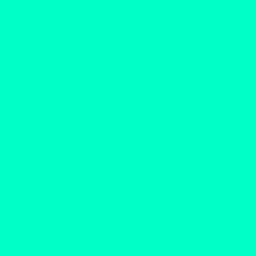

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


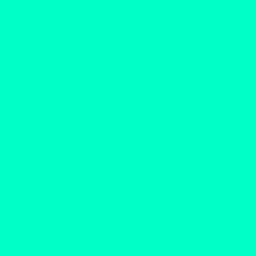

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


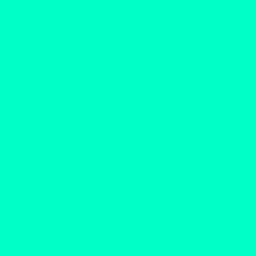

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


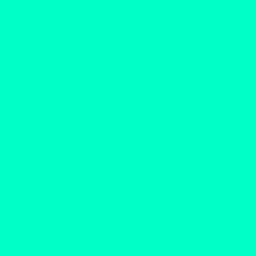

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
         483.,    0.,    0.,  483.,    0.,    0.], device='cuda:0')


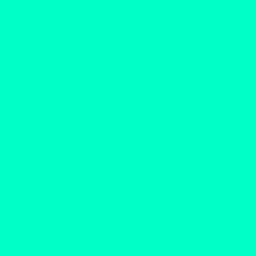

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2.,    2.,    2., -481.], device='cuda:0')


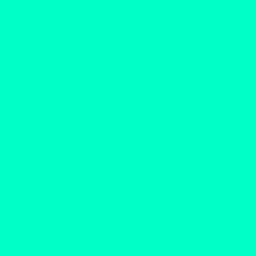

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


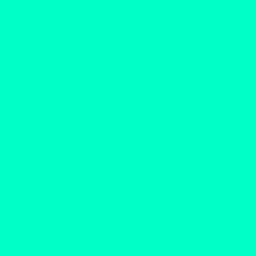

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0., 483.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


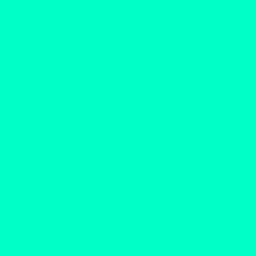

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,
           0.,  483.,  483.,    0.,    0.,    0.], device='cuda:0')


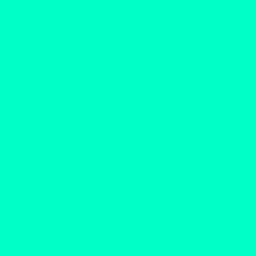

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


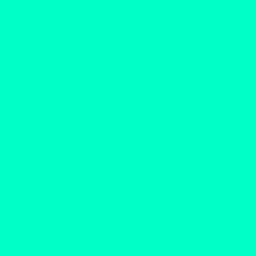

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    2., -481., -481.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,
           0., -481.,    2.,    2., -481.,    2.], device='cuda:0')


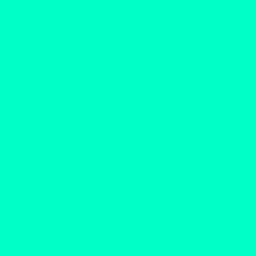

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,
           2.,    2.,    2., -481., -481.,    0.], device='cuda:0')


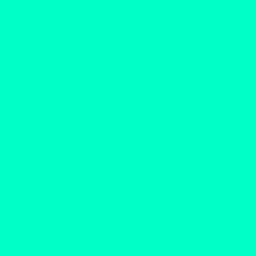

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


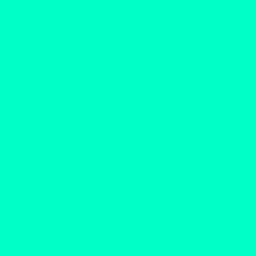

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483., 483.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


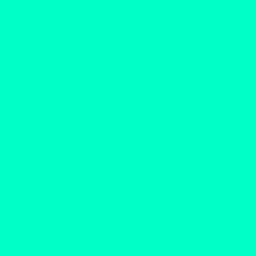

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483., 483.,   0., 483.,   0.],
       device='cuda:0')


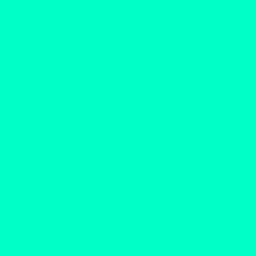

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


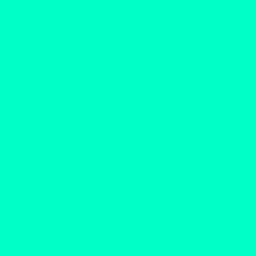

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,  483.,    0.,    0.,  483.,    0.], device='cuda:0')


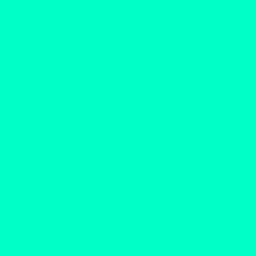

ステップ:  66%|██████▌   | 330/500 [00:02<00:01, 159.42it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481., -481., -481.,    2., -481.,    2.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2.,    2.,    2., -481.], device='cuda:0')


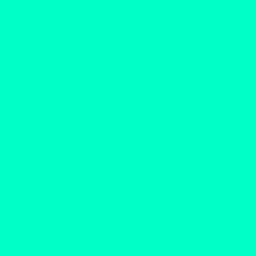

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 483.,   0.],
       device='cuda:0')


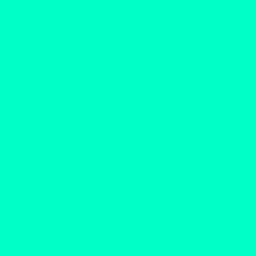

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


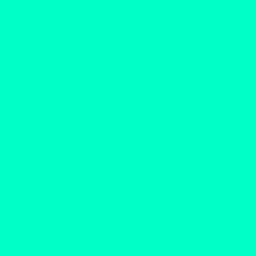

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


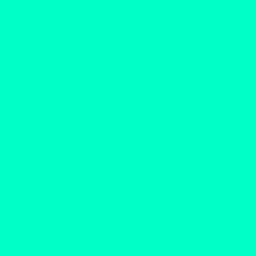

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,  483.,    0.,    0.,    0.], device='cuda:0')


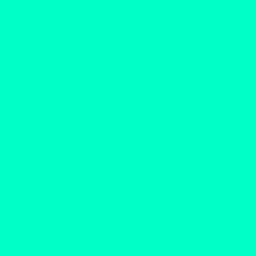

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,  483.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


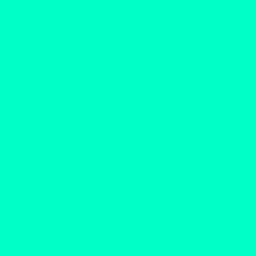

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.], device='cuda:0')


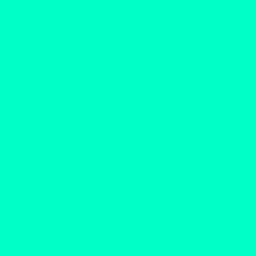

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


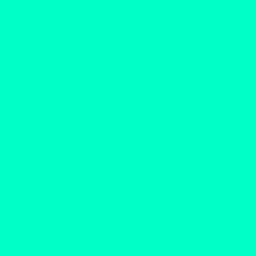

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


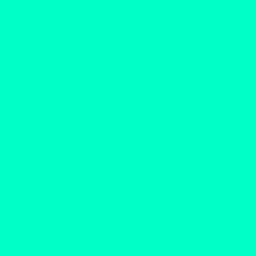

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0.,
        2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0.],
       device='cuda:0')


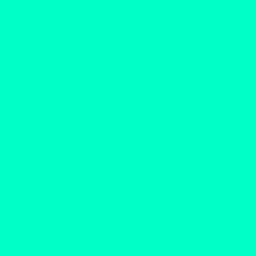

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


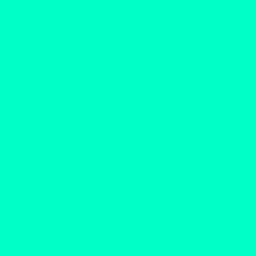

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


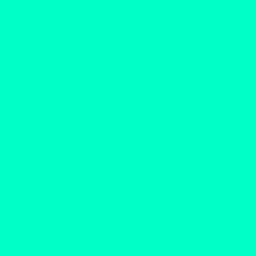

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
           2., -481., -481., -481.,    2., -481.], device='cuda:0')


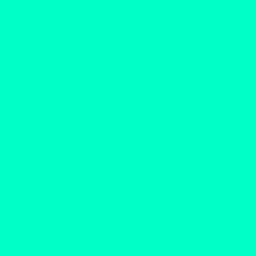

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -481., -481.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


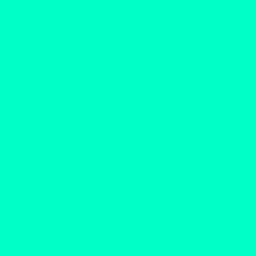

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


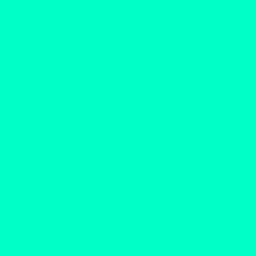

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


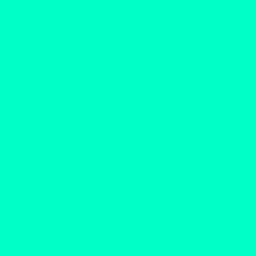

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


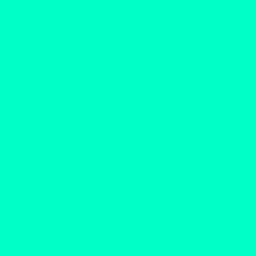

ステップ:  69%|██████▉   | 347/500 [00:02<00:00, 160.06it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


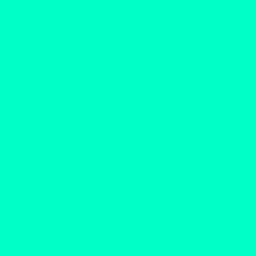

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481.,    2., -481., -481., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2.,    2., -481.,    2.], device='cuda:0')


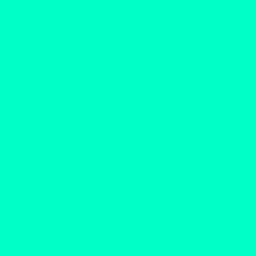

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2., -481.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2., -481.,    2.], device='cuda:0')


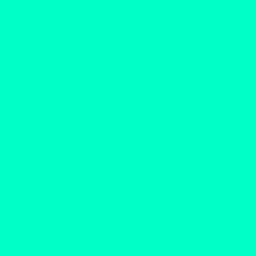

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    2.,    2., -481., -481.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -481.,    2.,    2.,    2., -481.], device='cuda:0')


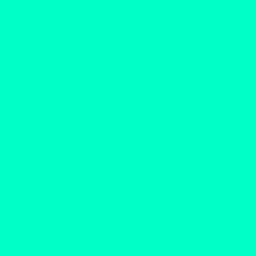

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -481., -481.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,    2.,
           0.,  483.,  483.,    0.,  483.,    0.], device='cuda:0')


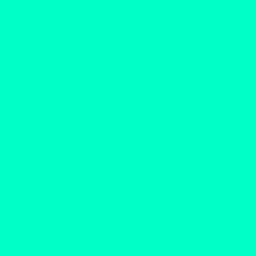

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,  483.,  483.,  483., -481.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


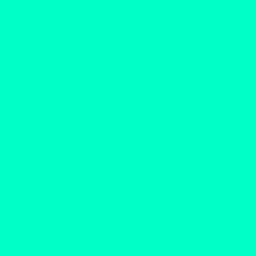

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


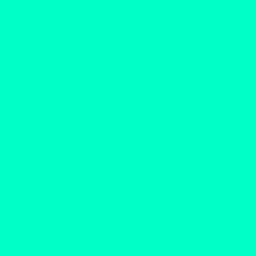

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


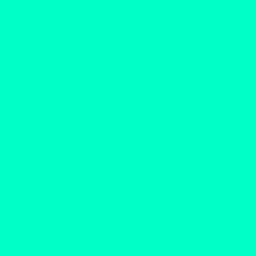

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483.,    0.,    0.,    0.,    0.,    0., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


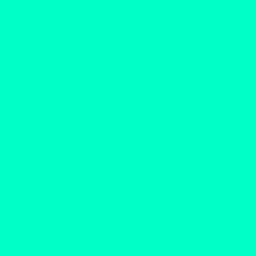

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,  483.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


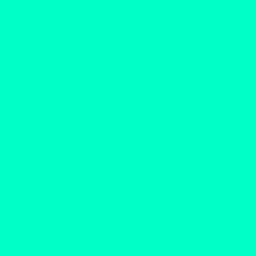

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


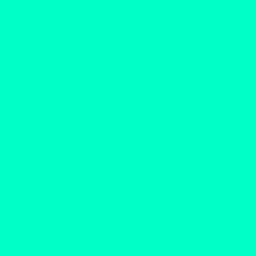

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


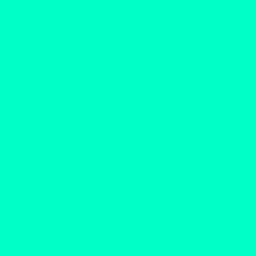

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2., -481.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2., -481.,    2.,    2.,    2.], device='cuda:0')


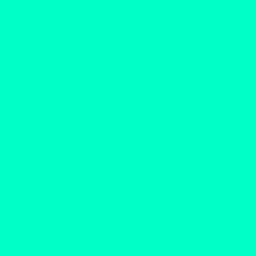

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


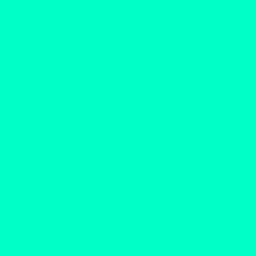

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2., -481.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -481.,    2.,    2.,    2.,    0.], device='cuda:0')


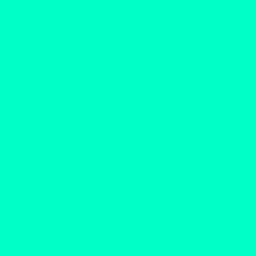

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0., -481., -481.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,
           2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483., -481.,    2.,    2.,    2., -481.], device='cuda:0')


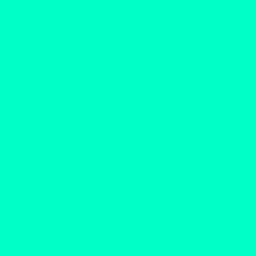

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


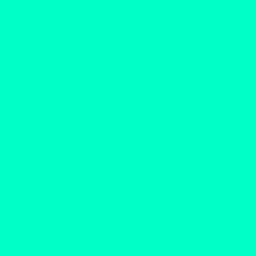

ステップ:  73%|███████▎  | 364/500 [00:02<00:00, 159.75it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483., 483.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


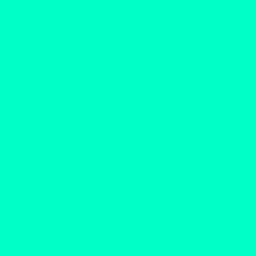

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


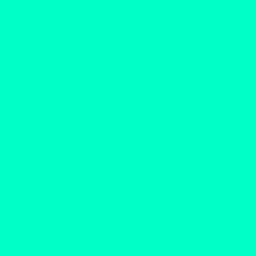

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


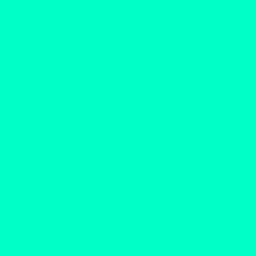

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


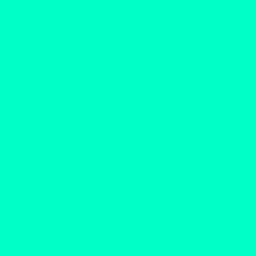

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


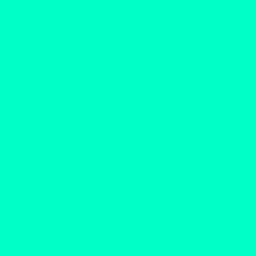

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481., -481., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.], device='cuda:0')


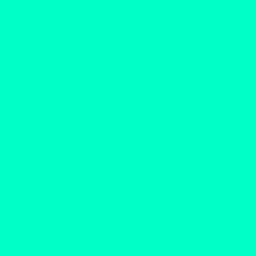

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


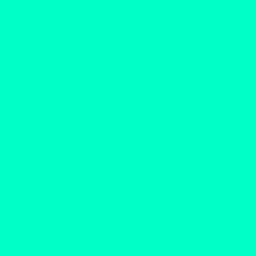

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
         483.,    0.,    0.,  483.,  483.,    0.], device='cuda:0')


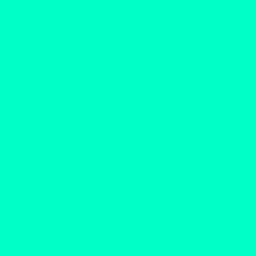

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


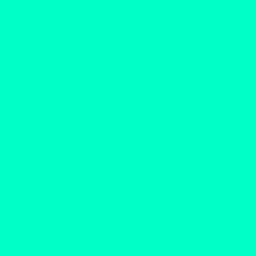

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481., -481.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


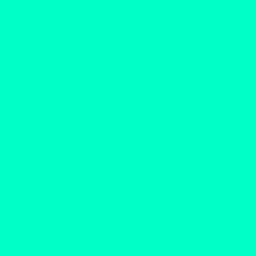

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


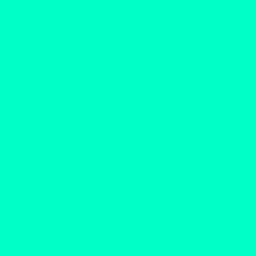

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0., 483.,   0.,   0.],
       device='cuda:0')


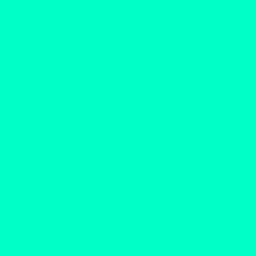

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483., 483., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


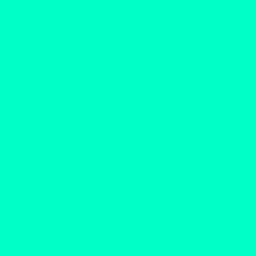

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


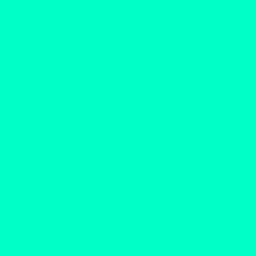

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


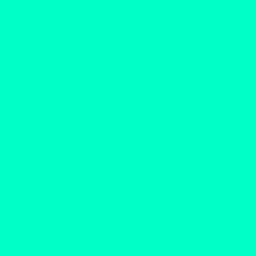

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


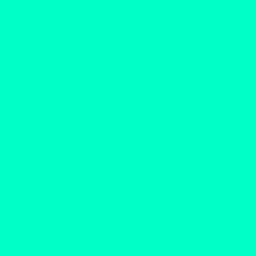

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,  483.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


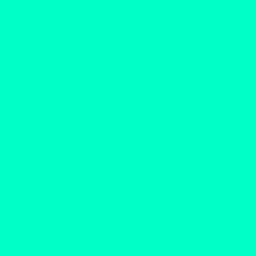

ステップ:  76%|███████▌  | 381/500 [00:02<00:00, 159.95it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


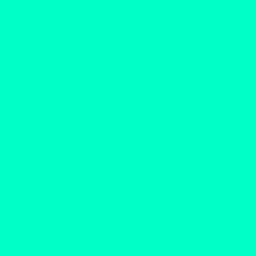

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2., -481.,    2.,    2., -481.], device='cuda:0')


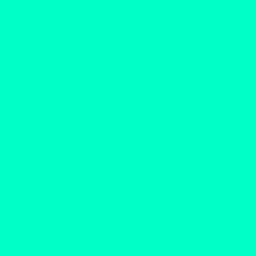

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,
        -481., -481.,    2., -481.,    2.,    0.], device='cuda:0')


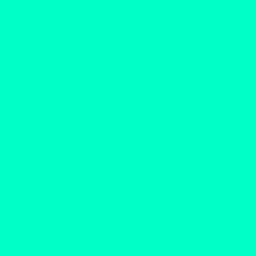

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2., -481.,    2.,    0.], device='cuda:0')


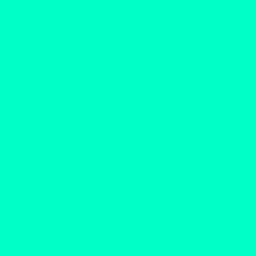

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
        0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.],
       device='cuda:0')


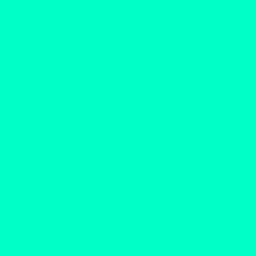

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2., -481., -481.,    2., -481.], device='cuda:0')


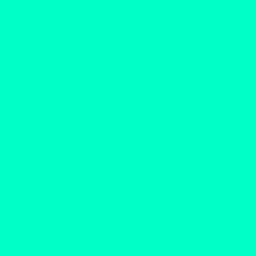

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


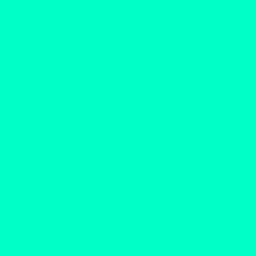

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


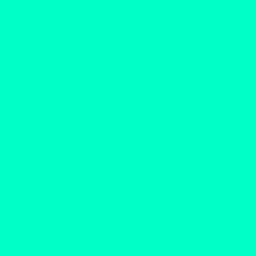

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2., -481.,    2.,    2., -481.], device='cuda:0')


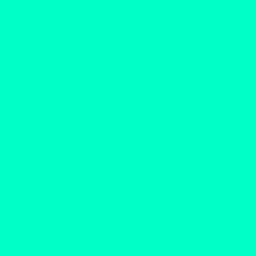

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


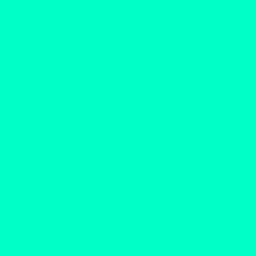

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


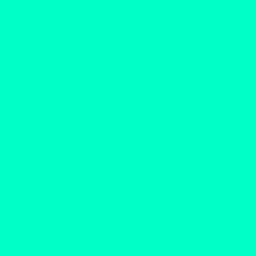

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,
        -481.,    2., -481., -481.,    2.,    0.], device='cuda:0')


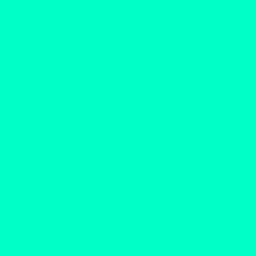

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.], device='cuda:0')


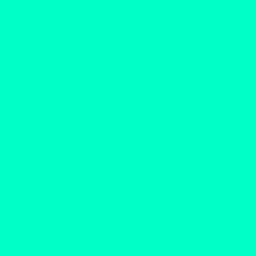

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


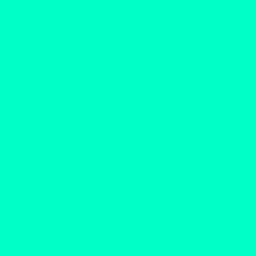

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


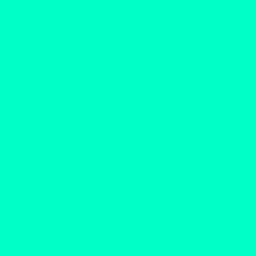

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -481.,    2.,    2., -481.,    0.], device='cuda:0')


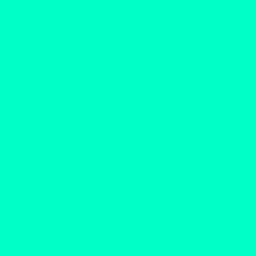

ステップ:  79%|███████▉  | 397/500 [00:02<00:00, 159.63it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2., -481.,  483.], device='cuda:0')


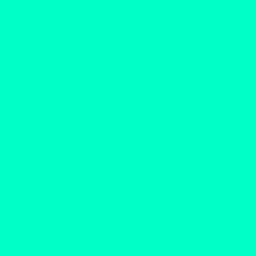

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0., 483.,   0.],
       device='cuda:0')


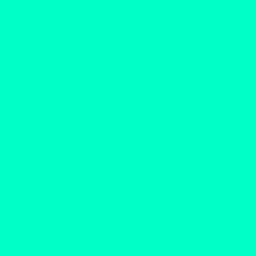

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
        0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.],
       device='cuda:0')


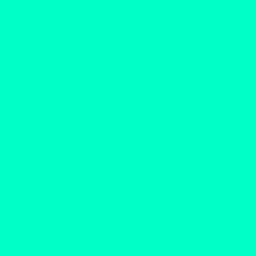

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
         483.,    0.,    0.,    0.,    0.,  483.], device='cuda:0')


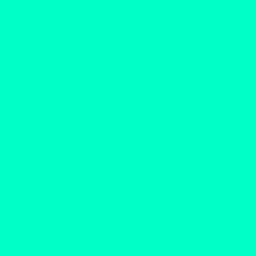

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


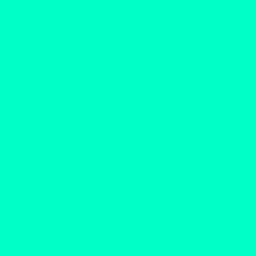

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


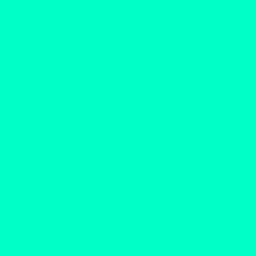

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


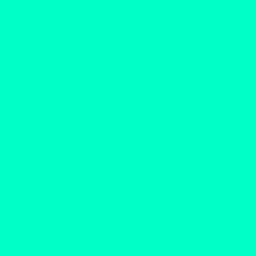

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.], device='cuda:0')


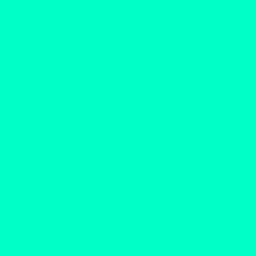

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


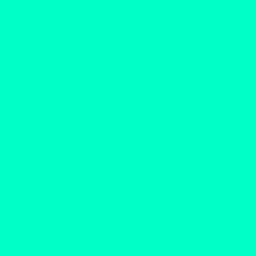

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,  483.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


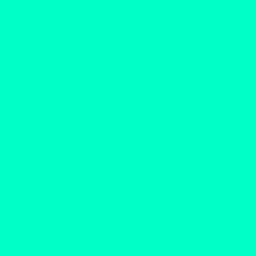

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
           0.,    0.,  483.,    0.,    0.,    0.], device='cuda:0')


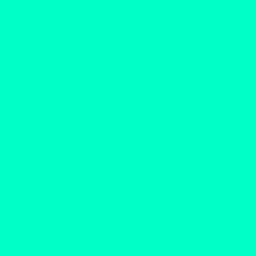

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481., -481.,    2.,    2.,    2.], device='cuda:0')


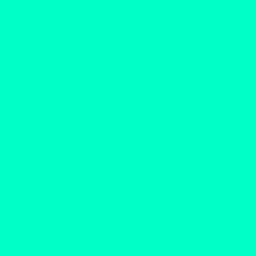

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    2., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2., -481.,    2.,    2.], device='cuda:0')


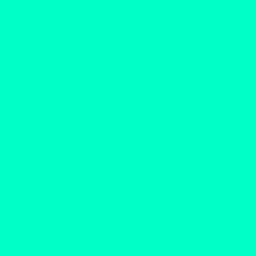

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


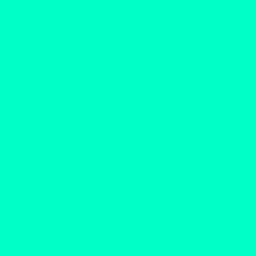

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,  483.,    0., -481.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


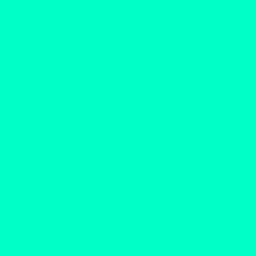

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


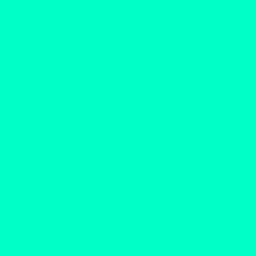

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481., -481.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2., -481.,    2., -481., -481.], device='cuda:0')


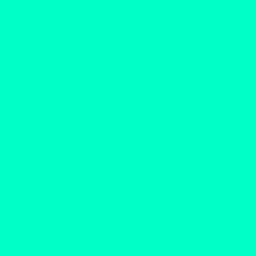

ステップ:  83%|████████▎ | 414/500 [00:02<00:00, 160.01it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


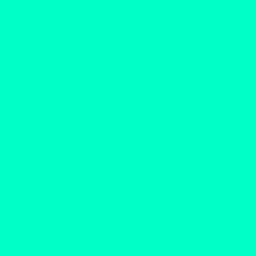

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,
        -481.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


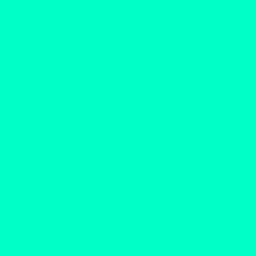

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


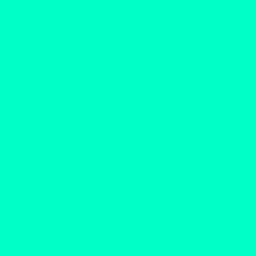

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0., 483.],
       device='cuda:0')


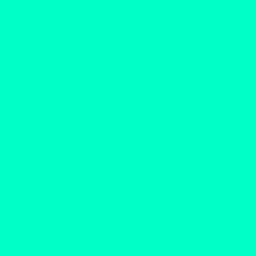

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


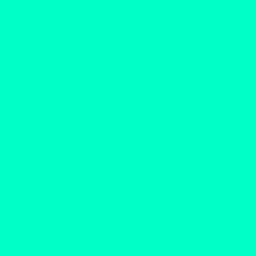

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,  483.,    0.,    0.,    0.], device='cuda:0')


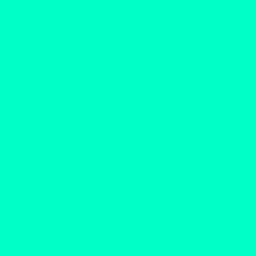

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


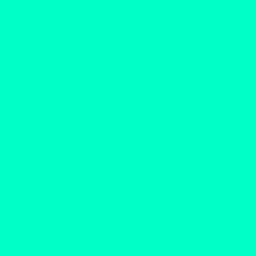

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


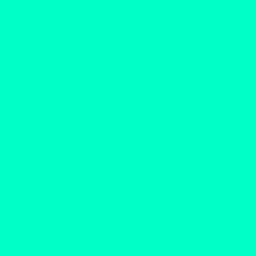

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2., -481., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


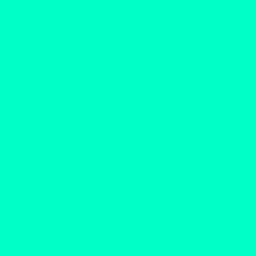

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
         483.,    0.,    0.,    0.,    0.,  483.], device='cuda:0')


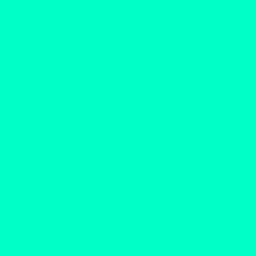

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2., -481.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,
           0., -481., -481.,    2., -481.,    2.], device='cuda:0')


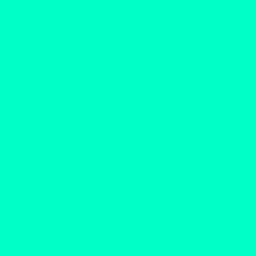

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,  483.,  483.,  483.,    0.], device='cuda:0')


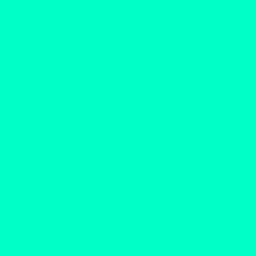

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,  483.,    0.,    0.,    0.,    0.], device='cuda:0')


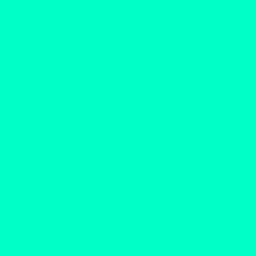

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2., -481., -481.,    2., -481.], device='cuda:0')


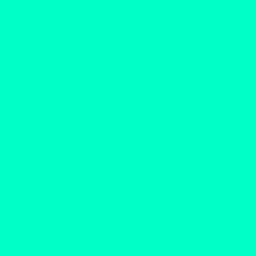

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


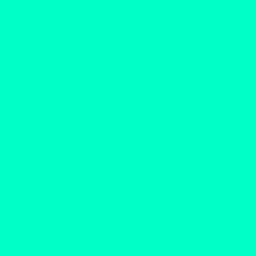

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2., -481.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
        -481.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


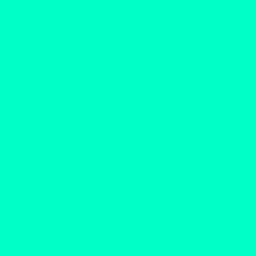

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    2., -481.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


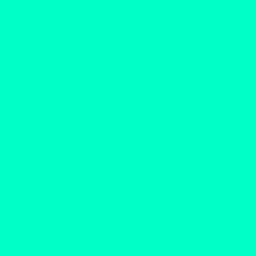

ステップ:  86%|████████▌ | 431/500 [00:02<00:00, 159.63it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483., 483., 483., 483.,   0.,   0.,   0.],
       device='cuda:0')


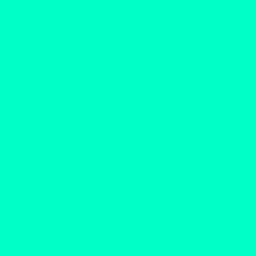

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


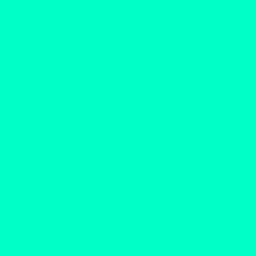

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,  483.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


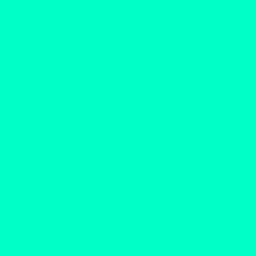

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


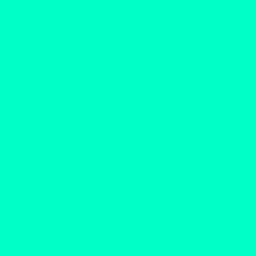

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2., -481., -481.,    2., -481.,  483.], device='cuda:0')


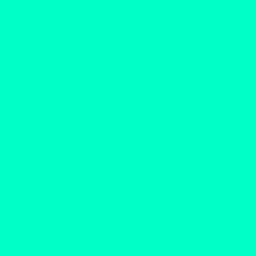

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


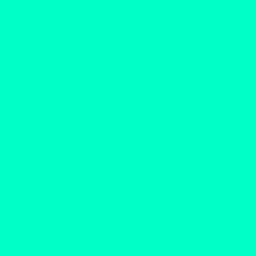

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,  483.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2., -481.,
        -481.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


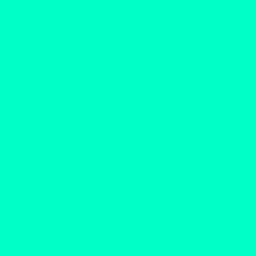

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  483.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


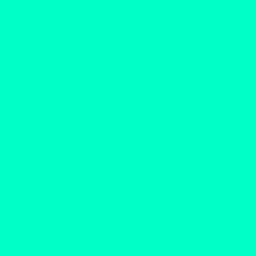

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,
           0.,  483.,    0.,    0.,    0.,  483.], device='cuda:0')


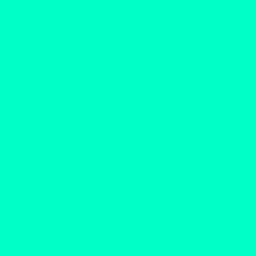

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483.,   0.,   0.,   0.,   0.],
       device='cuda:0')


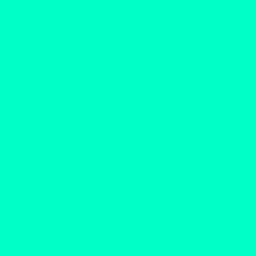

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


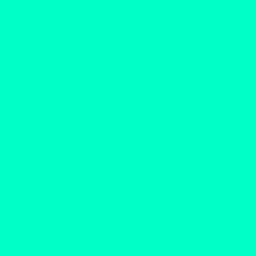

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


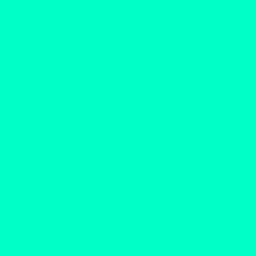

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0.,
        2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')


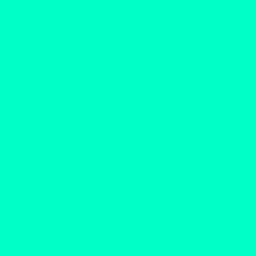

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483., 483., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


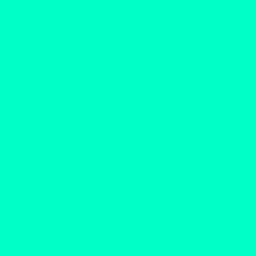

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


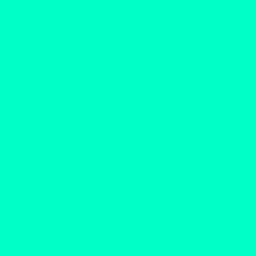

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


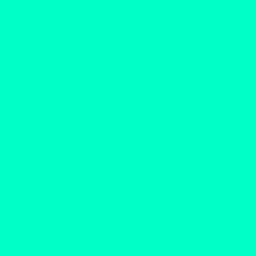

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


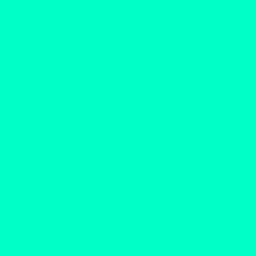

ステップ:  90%|████████▉ | 448/500 [00:02<00:00, 160.08it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


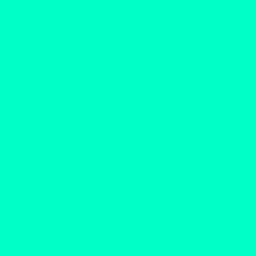

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,    0.,    2.,    2.,    2.,    2.,
           2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,
           2., -481.,    2., -481.,    2.,    0.], device='cuda:0')


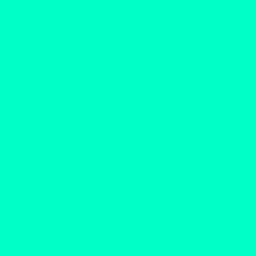

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481., -481.], device='cuda:0')


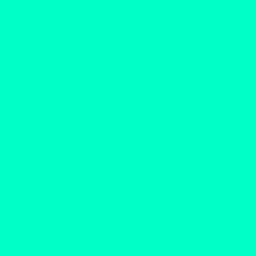

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0., 483.,   0.,   0.,   0.],
       device='cuda:0')


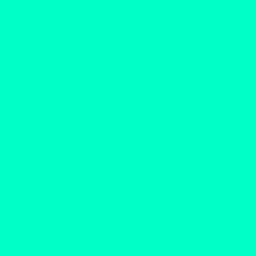

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483., 483.,   0.],
       device='cuda:0')


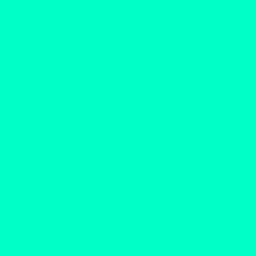

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,    0.,    0.,    0., -481.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


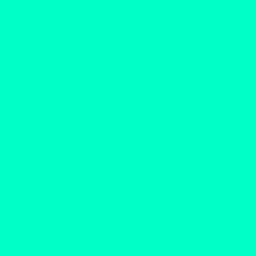

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483., -481.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483.,    2.,    2.,    2., -481.,    2.], device='cuda:0')


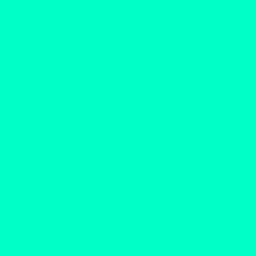

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


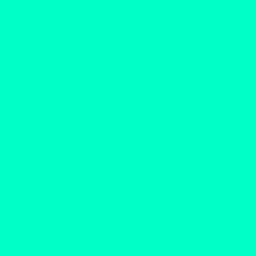

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,  483.], device='cuda:0')


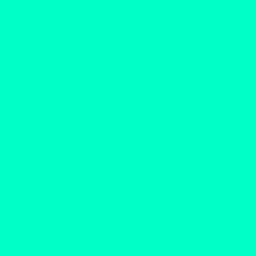

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2., -481.], device='cuda:0')


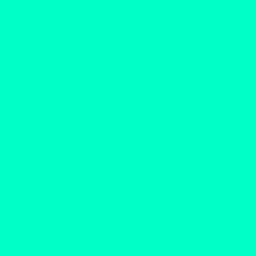

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2., -481.,    2.,    2.,    0.], device='cuda:0')


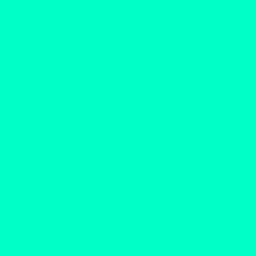

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


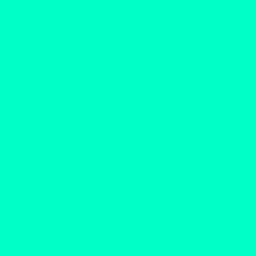

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0., 483.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


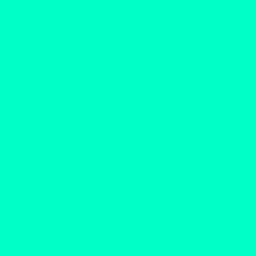

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


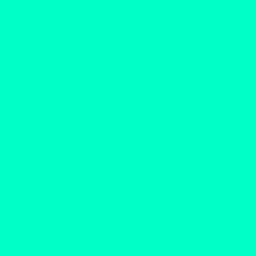

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([ 483., -481.,    2., -481.,    2., -481.,    0.,    2.,    2.,    2.,
           2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0.,    2., -481.,    2.,    2.,    2.], device='cuda:0')


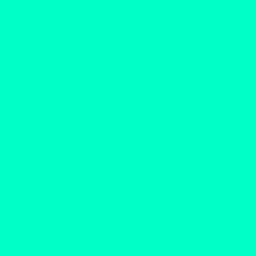

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2.,    2.,    2.,    2.], device='cuda:0')


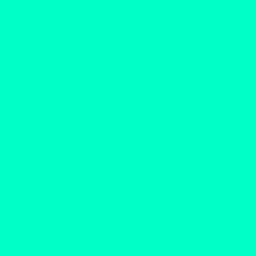

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0., 483.,   0.],
       device='cuda:0')


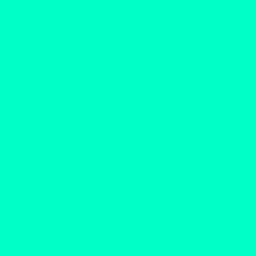

ステップ:  93%|█████████▎| 465/500 [00:02<00:00, 159.61it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2., -481.,    2.,    0.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


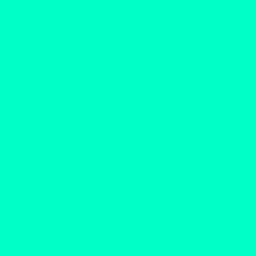

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483., 483., 483.,   0., 483., 483.,   0.],
       device='cuda:0')


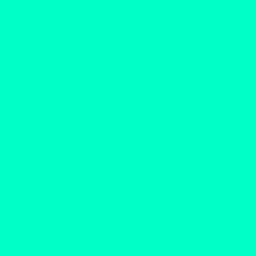

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


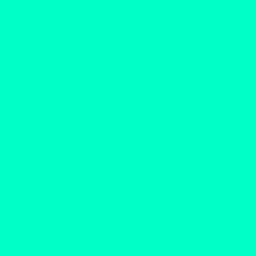

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   0.,   0., 483.,   0., 483.,   0.],
       device='cuda:0')


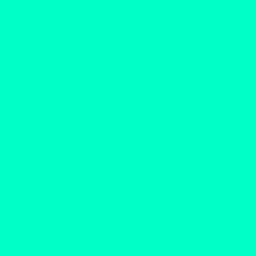

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2., -481.,
         483.,  483.,    0.,    0.,    0.,  483.], device='cuda:0')


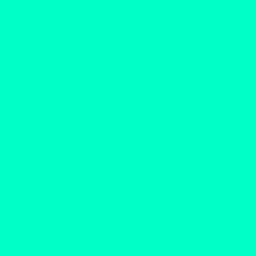

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481., -481.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2.,    2.,    2.,    2.,    0.], device='cuda:0')


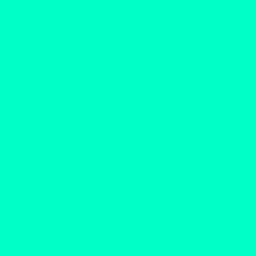

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 483.,   0.],
       device='cuda:0')


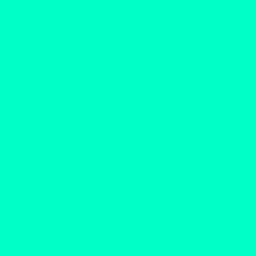

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,    0.,    0.,  483.,    0., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


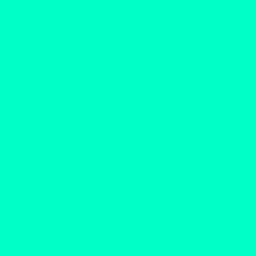

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481., -481.,    2., -481.,    2., -481.], device='cuda:0')


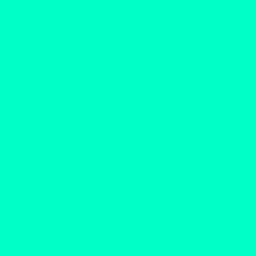

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,    0.,  483.], device='cuda:0')


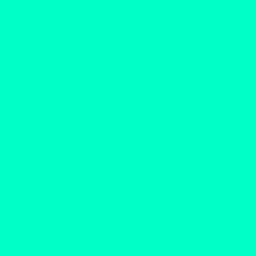

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
           0., -481.,    2., -481., -481., -481.], device='cuda:0')


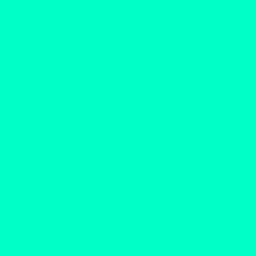

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
        -481., -481.,    2.,    2., -481.,    0.], device='cuda:0')


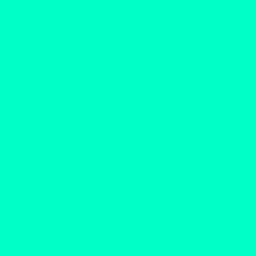

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2., -481.,
           2.,    2.,    2.,    2., -481.,    2.], device='cuda:0')


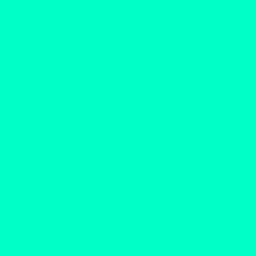

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0., 483.],
       device='cuda:0')


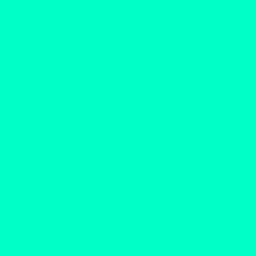

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2., -481., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


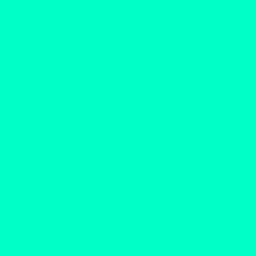

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0., 483.,   0.,   0.,   0., 483.],
       device='cuda:0')


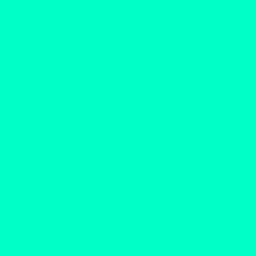

ステップ:  96%|█████████▌| 481/500 [00:03<00:00, 159.59it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,    2.,
           2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,
           2.,    2., -481.,    2., -481.,    0.], device='cuda:0')


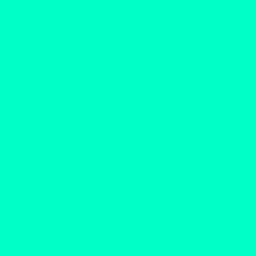

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


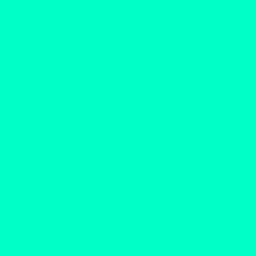

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,
           0.,    0.,    0.,    0.,  483.,    0.], device='cuda:0')


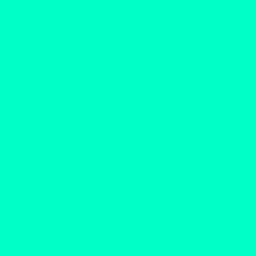

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481., -481.,    2., -481.,    2.,    2., -481.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.], device='cuda:0')


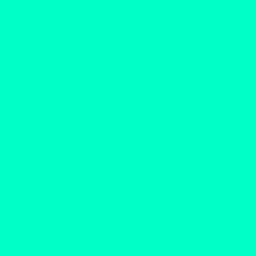

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0., 483.,   0.,   0., 483.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.],
       device='cuda:0')


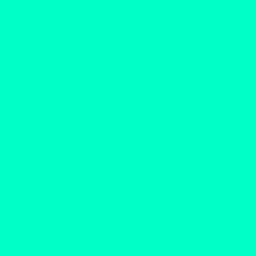

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,  483.,    0.,    0.,    0.,    0.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2., -481.], device='cuda:0')


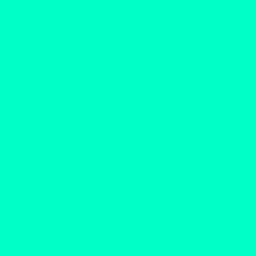

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,
          2.,   2.,   2.,   2.,   2.,   2., 483.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


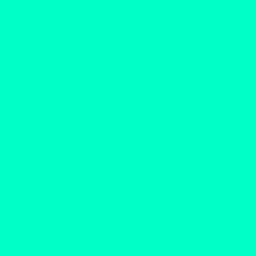

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,    0.,    0.,  483., -481.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


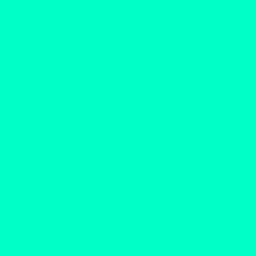

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       device='cuda:0')


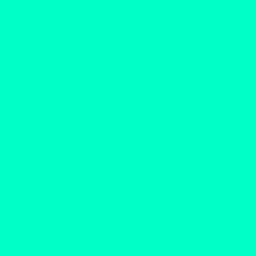

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


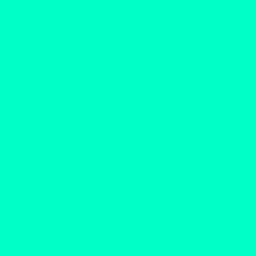

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0., 483.,   0.,   0.,   0., 483.,   2.,   2.,   2.,   2.,   2.,
          0.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,
        483.,   2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.],
       device='cuda:0')


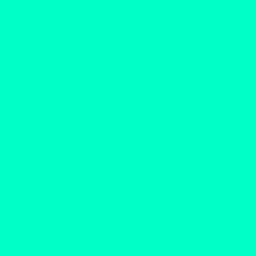

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   2.,    2.,    2.,    2., -481.,    0.,    2.,    2.,    2.,    2.,
           2.,    0.,    2.,    2.,    2.,    2.,    2.,    0.,    2.,    2.,
           2.,    2.,    2.,  483.,    2.,    2.,    2.,    2.,    2.,  483.,
           2., -481.,    2.,    2.,    2.,  483.], device='cuda:0')


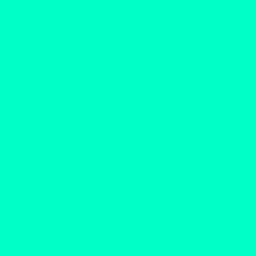

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([-481., -481., -481.,    2.,    2., -481.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2.,    2.,    2.,    2., -481.,    2.,    2.,
           2.,    2.,    2., -481., -481.,    2.,    2.,    2.,    2.,    2.,
           2.,    2., -481.,    2., -481.,    2.], device='cuda:0')


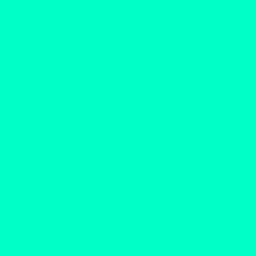

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    2.,    2., -481.,    2.,    2.,  483.,    2.,    2.,    2.,
           2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,  483.,    2.,
           2.,    2.,    2.,    2.,    0.,    2.,    2.,    2.,    2.,    2.,
         483.,    2., -481.,    2., -481.,    2.], device='cuda:0')


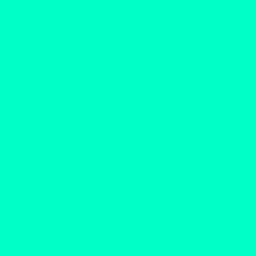

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   0.,   0.,   0., 483.,   0.,   0.],
       device='cuda:0')


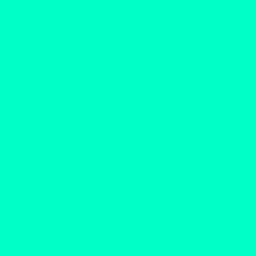

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  0.,   0.,   0., 483.,   0.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2., 483.],
       device='cuda:0')


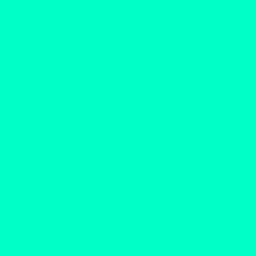

ステップ:  99%|█████████▉| 497/500 [00:03<00:00, 159.67it/s]

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
        0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.],
       device='cuda:0')


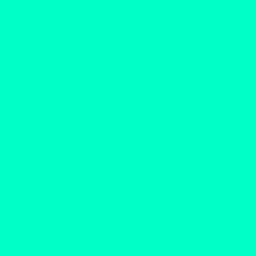

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([   0.,    0.,  483.,  483.,  483.,    0.,    2.,    2.,    2.,    2.,
           2., -481.,    2.,    2.,    2.,    2.,    2.,    2., -481.,    2.,
           2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,    2.,
        -481.,    2.,    2.,    2.,    2.,    2.], device='cuda:0')


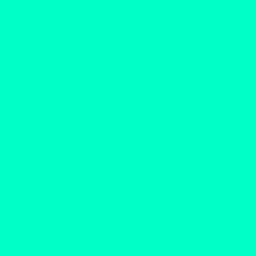

area: tensor([  0., 256.,   0.], device='cuda:0')
perimeter: tensor([ 0., 64.,  0.], device='cuda:0')
delta_H_area: tensor([  2.,   2.,   2.,   2.,   2., 483.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   2.,   2.,   2.,   0.,
          2.,   2.,   2.,   2.,   2., 483.,   0.,   0.,   0.,   0., 483.,   0.],
       device='cuda:0')


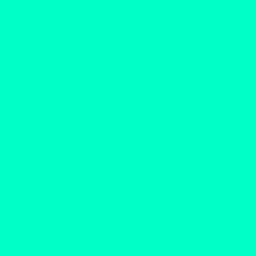

ステップ: 100%|██████████| 500/500 [00:03<00:00, 156.43it/s]


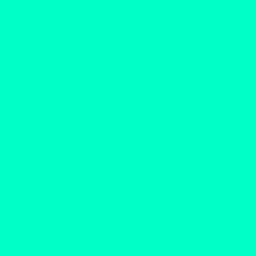

In [6]:
step = 500  # ステップ数
mcs_per_step = 1  # 1ステップあたりのMCS数

# オプション: 動画記録用ライターの初期化
video_filename = "../results/cpm_torch_jp.mp4"
writer = LoopWriter(filename=video_filename, fps=10)  # ループ動画ライター

# --- シミュレーション実行 ---
for i in tqdm(range(step), desc="ステップ"):
    for k in range(mcs_per_step):
        tensor = cpm.cpm_checkerboard_step_single_func(tensor)

    # --- 動画フレーム追加 ---
    frame_rgb = map_tensor_to_rgb(tensor[0])
    zoomed = torch.tensor(zoom(frame_rgb, 4))  # 画像を4倍に拡大
    writer.add(zoomed)
    imshow_map(tensor[0])  # 各ステップの状態を表示

writer.close()
imshow_map(tensor[0])

# 逆伝番